<a href="https://colab.research.google.com/github/Nouhailachakouk/Our-Predicto/blob/main/understand_CIA_DATASET_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      500 non-null    int64  
 1   Product ID               500 non-null    object 
 2   Type                     500 non-null    object 
 3   Air temperature [K]      500 non-null    float64
 4   Process temperature [K]  500 non-null    float64
 5   Rotational speed [rpm]   500 non-null    int64  
 6   Torque [Nm]              500 non-null    float64
 7   Vibration Levels         500 non-null    float64
 8   Operational Hours        500 non-null    float64
 9   Failure Type             500 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 39.2+ KB
None
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L             

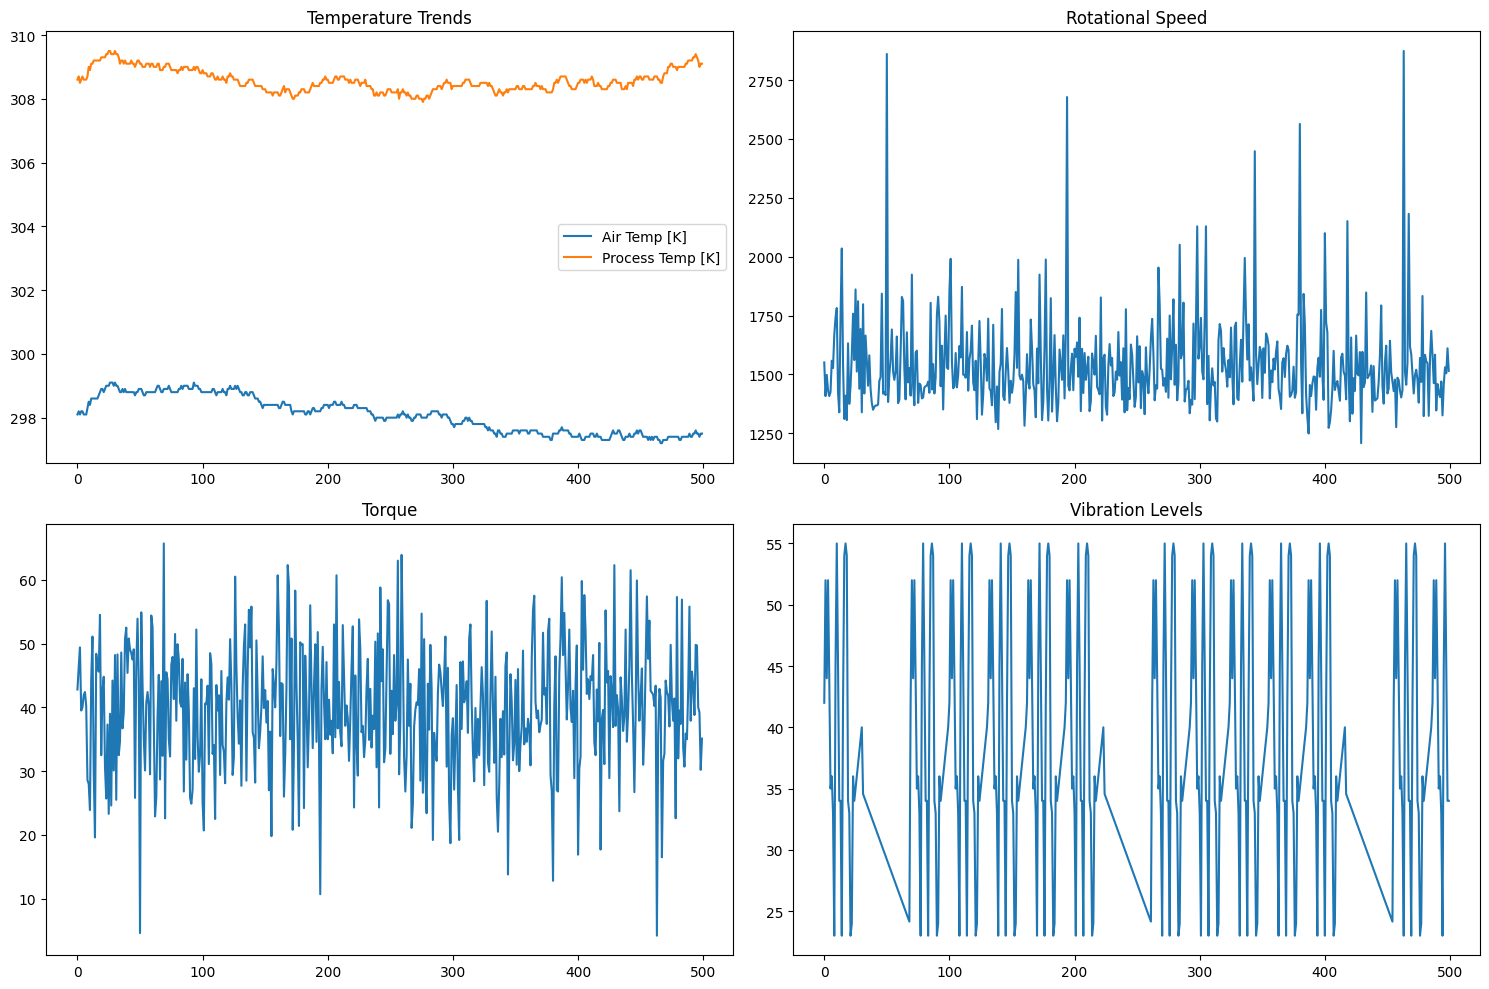


Failure Type Distribution:
Failure Type
No Failure            467
Tool Wear Failure      19
Overstrain Failure      8
Power Failure           6
Name: count, dtype: int64


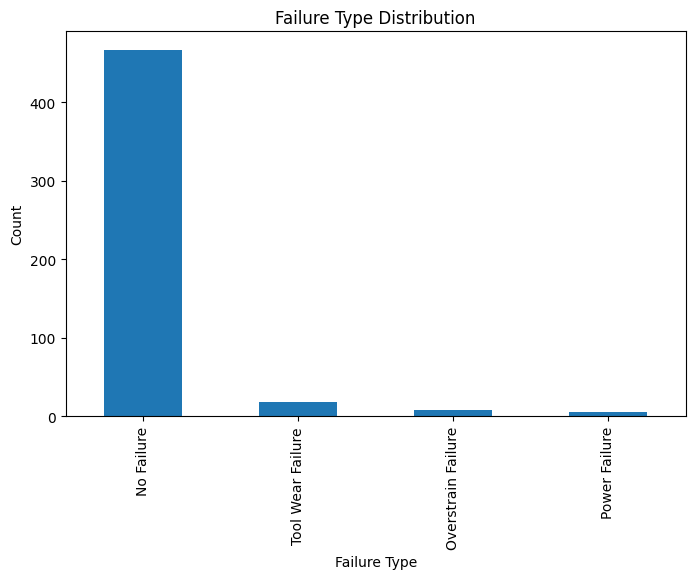

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data - assuming your file is still named 'ai4i2020.csv'
df = pd.read_csv('/content/CIA-1 Dataset - Dataset (1).csv')

# Display basic info about the dataframe
print(df.info())

# Display first few rows
print(df.head())

# Basic statistics
print(df.describe())

# Plotting some key metrics
plt.figure(figsize=(15, 10))

# Plot Air temperature and Process temperature
plt.subplot(2, 2, 1)
plt.plot(df['Air temperature [K]'], label='Air Temp [K]')
plt.plot(df['Process temperature [K]'], label='Process Temp [K]')
plt.title('Temperature Trends')
plt.legend()

# Plot Rotational speed
plt.subplot(2, 2, 2)
plt.plot(df['Rotational speed [rpm]'], label='Rotational Speed [rpm]')
plt.title('Rotational Speed')

# Plot Torque
plt.subplot(2, 2, 3)
plt.plot(df['Torque [Nm]'], label='Torque [Nm]')
plt.title('Torque')

# Plot Vibration Levels
plt.subplot(2, 2, 4)
plt.plot(df['Vibration Levels '], label='Vibration Levels ')
plt.title('Vibration Levels')

plt.tight_layout()
plt.show()

# Failure Type analysis
if 'Failure Type' in df.columns:
    failure_counts = df['Failure Type'].value_counts()
    print("\nFailure Type Distribution:")
    print(failure_counts)

    plt.figure(figsize=(8, 5))
    failure_counts.plot(kind='bar')
    plt.title('Failure Type Distribution')
    plt.ylabel('Count')
    plt.show()

In [ ]:
# Check frequency of missing data (updated to 'h' for hours)
missing_hours = pd.date_range(
    start=df.index.min(),
    end=df.index.max(),
    freq='h'  # Use 'h' instead of deprecated 'H'
).difference(df.index)

print(f"Missing hours: {len(missing_hours)}")
print(f"Example missing timestamps:\n{missing_hours[:5]}")  # Inspect first 5 gaps

Missing hours: 1
Example missing timestamps:
DatetimeIndex(['1970-01-01 00:00:00'], dtype='datetime64[ns]', freq='h')


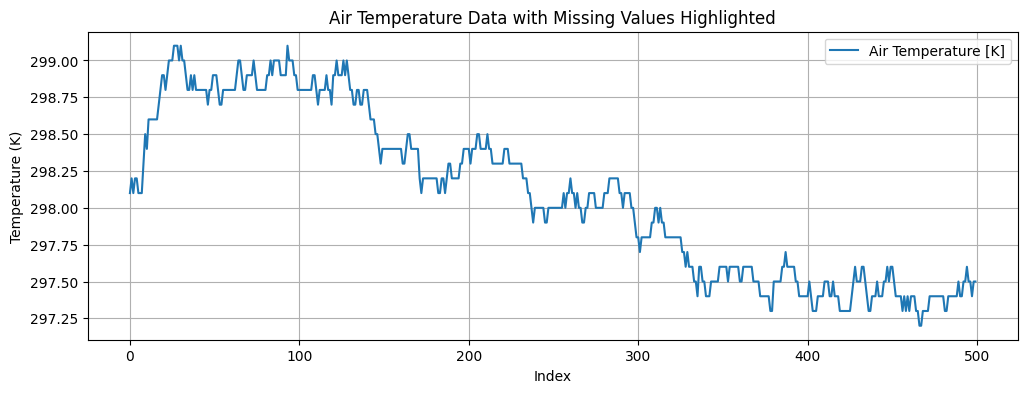

In [ ]:
plt.figure(figsize=(12, 4))

# Plotting Air Temperature as an example - you can change this to any other continuous variable
plt.plot(df.index, df['Air temperature [K]'], label='Air Temperature [K]')

# If you want to highlight specific missing or anomalous data points
# First, let's find any null values in the temperature column
missing_points = df[df['Air temperature [K]'].isnull()].index

# Highlight missing data points (if any exist)
if len(missing_points) > 0:
    plt.scatter(missing_points,
                [-1]*len(missing_points),
                color='red',
                marker='x',
                label='Missing Data Points')

plt.legend()
plt.title('Air Temperature Data with Missing Values Highlighted')
plt.ylabel('Temperature (K)')
plt.xlabel('Index')
plt.grid(True)
plt.show()

In [ ]:
# Set your target column (change this to whichever variable you want to analyze)
target_column = 'Air temperature [K]'

# Identify the largest gap period (if gaps exist)
if 'is_long_gap' in df_filled.columns and df_filled['is_long_gap'].sum() > 0:
    gap_periods = df[df_filled['is_long_gap'] == 1]
    gap_start = gap_periods.index[0]
    gap_end = gap_periods.index[-1]
    print(f"Major system downtime from {gap_start} to {gap_end}")
else:
    print("No significant gaps detected in the data")

No significant gaps detected in the data


In [ ]:
# Method A: Statistical bounds (μ ± 3σ)
mean = df_filled[target_column].mean()
std = df_filled[target_column].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

print(f"\nStatistical bounds for {target_column}:")
print(f"Mean: {mean:.2f}, Std: {std:.2f}")
print(f"Lower bound (μ-3σ): {lower_bound:.2f}")
print(f"Upper bound (μ+3σ): {upper_bound:.2f}")

# Copy the original series
df_filled[f'{target_column}_truncated'] = df_filled[target_column]

# Truncate outliers
df_filled[f'{target_column}_truncated'] = df_filled[f'{target_column}_truncated'].clip(
    lower=lower_bound,
    upper=upper_bound
)




Statistical bounds for Air temperature [K]:
Mean: 298.10, Std: 0.56
Lower bound (μ-3σ): 296.41
Upper bound (μ+3σ): 299.79


In [ ]:
# Optional: Flag truncated points
df_filled['is_truncated'] = (
    (df_filled[target_column] < lower_bound) |
    (df_filled[target_column] > upper_bound)
).astype(int)

truncated_count = df_filled['is_truncated'].sum()
total_points = len(df_filled)
print(f"\nPoints truncated: {truncated_count} ({truncated_count/total_points:.2%} of data)")


Points truncated: 0 (0.00% of data)


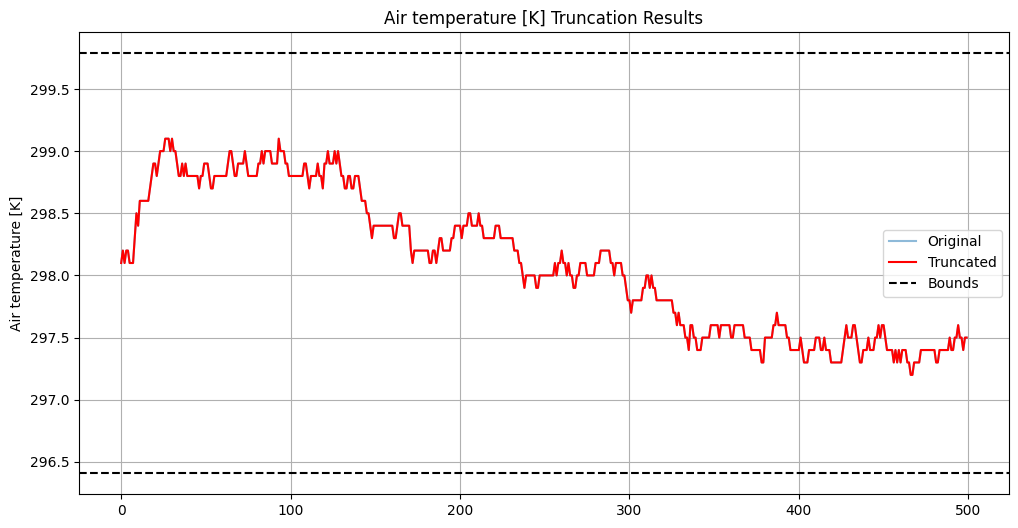

In [ ]:
# Plotting
plt.figure(figsize=(12,6))
plt.plot(df_filled.index, df_filled[target_column], label='Original', alpha=0.5)
plt.plot(df_filled.index, df_filled[f'{target_column}_truncated'], label='Truncated', color='red')
plt.axhline(y=upper_bound, color='k', linestyle='--', label='Bounds')
plt.axhline(y=lower_bound, color='k', linestyle='--')
plt.legend()
plt.title(f"{target_column} Truncation Results")
plt.ylabel(target_column)
plt.grid(True)
plt.show()

# Additional analysis: Show truncated points if any exist
if truncated_count > 0:
    truncated_points = df_filled[df_filled['is_truncated'] == 1]
    print("\nTruncated points summary:")
    print(truncated_points[[target_column, f'{target_column}_truncated']].describe())


Moving Average Calculations Sample:
   Air temperature [K]_truncated         sma         ema     wma
0                          298.1  298.100000  298.100000     NaN
1                          298.2  298.150000  298.115385     NaN
2                          298.1  298.133333  298.113018     NaN
3                          298.2  298.150000  298.126400  298.16
4                          298.2  298.175000  298.137723  298.18
5                          298.1  298.150000  298.131919  298.15
6                          298.1  298.150000  298.127009  298.13
7                          298.1  298.125000  298.122853  298.11
8                          298.3  298.150000  298.150107  298.18
9                          298.5  298.250000  298.203936  298.32


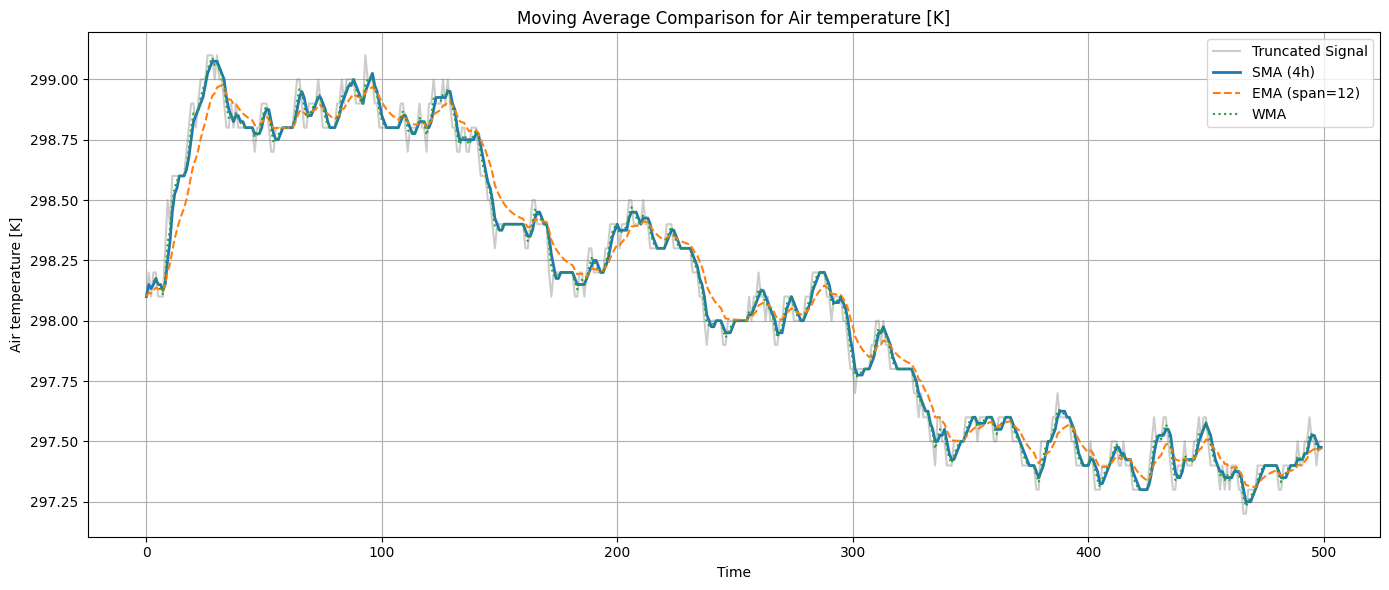


Moving Average Statistics:
              sma         ema         wma
count  500.000000  500.000000  497.000000
mean   298.099717  298.104732  298.098873
std      0.559837    0.550952    0.562152
min    297.250000  297.310021  297.230000
25%    297.525000  297.520194  297.530000
50%    298.100000  298.104537  298.090000
75%    298.675000  298.654122  298.690000
max    299.075000  298.975973  299.090000

NaN values in each series:
sma    0
ema    0
wma    3
dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set your target column (change this to whichever variable you want to analyze)
target_column = 'Air temperature [K]'  # Example - change to your desired column

# 1. Ensure we have the required truncated column
if f'{target_column}_truncated' not in df_filled.columns:
    print(f"Creating truncated version of {target_column}...")
    # Calculate bounds (using 3σ method as in previous code)
    mean = df_filled[target_column].mean()
    std = df_filled[target_column].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    df_filled[f'{target_column}_truncated'] = df_filled[target_column].clip(
        lower=lower_bound,
        upper=upper_bound
    )

# 2. Calculate all moving averages
window_size = 4  # hours
weights = np.array([0.1, 0.2, 0.3, 0.4])  # For WMA (customizable)

# Simple Moving Average (SMA)
df_filled['sma'] = df_filled[f'{target_column}_truncated'].rolling(
    window=window_size,
    min_periods=1
).mean()

# Exponential Moving Average (EMA)
df_filled['ema'] = df_filled[f'{target_column}_truncated'].ewm(
    span=12,  # 12-period span
    adjust=False,
    min_periods=1
).mean()

# Weighted Moving Average (WMA)
df_filled['wma'] = df_filled[f'{target_column}_truncated'].rolling(
    window=len(weights)
).apply(lambda x: np.dot(x, weights) if len(x) == len(weights) else np.nan)

# 3. Verify calculations
print("\nMoving Average Calculations Sample:")
print(df_filled[[f'{target_column}_truncated', 'sma', 'ema', 'wma']].head(10))

# 4. Visualization
plt.figure(figsize=(14,6))
plt.plot(df_filled.index, df_filled[f'{target_column}_truncated'],
         label='Truncated Signal', alpha=0.4, color='gray')
plt.plot(df_filled.index, df_filled['sma'],
         label=f'SMA ({window_size}h)', linewidth=2)
plt.plot(df_filled.index, df_filled['ema'],
         label='EMA (span=12)', linestyle='--')
plt.plot(df_filled.index, df_filled['wma'],
         label='WMA', linestyle=':')

plt.title(f"Moving Average Comparison for {target_column}")
plt.ylabel(target_column)
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Additional diagnostics
print("\nMoving Average Statistics:")
print(df_filled[['sma', 'ema', 'wma']].describe())

# Check for remaining NaN values
print("\nNaN values in each series:")
print(df_filled[['sma', 'ema', 'wma']].isna().sum())

In [ ]:
print("Current columns:", df.columns.tolist())

Current columns: ['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Vibration Levels ', 'Operational Hours', 'Failure Type']



Truncation bounds for Rotational speed [rpm]:
Lower bound (1st percentile): 1281.94
Upper bound (99th percentile): 2184.66

Low-pass filter applied successfully!


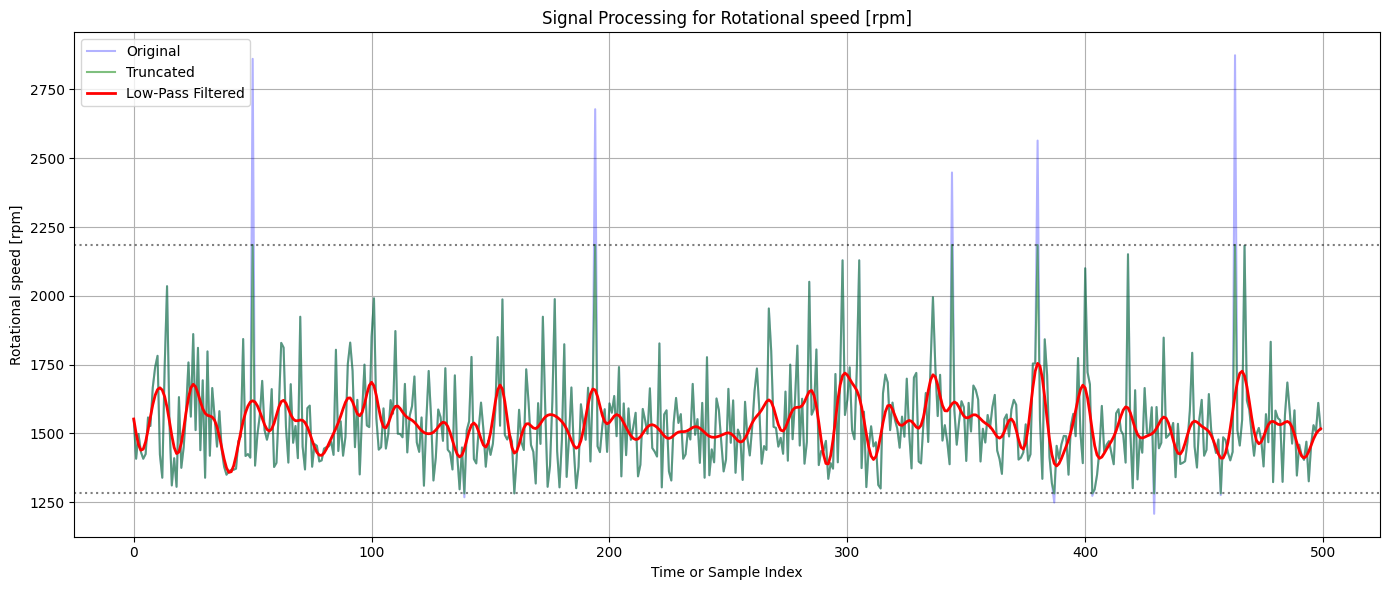


Signal Statistics:
          Original    Truncated     Filtered
count   500.000000   500.000000   500.000000
mean   1540.494000  1535.762000  1535.714193
std     193.658248   167.581817    72.646962
min    1208.000000  1281.940000  1358.334456
25%    1424.750000  1424.750000  1489.644629
50%    1498.000000  1498.000000  1531.565792
75%    1604.500000  1604.500000  1577.225597
max    2874.000000  2184.660000  1754.575308

Percentage of data points truncated: 2.00%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Set your target column (change this to whichever variable you want to analyze)
target_column = 'Rotational speed [rpm]'  # Example - change to your desired column

# 1. Calculate bounds using percentiles (adjust as needed)
lower_bound = df[target_column].quantile(0.01)  # 1st percentile
upper_bound = df[target_column].quantile(0.99)  # 99th percentile

print(f"\nTruncation bounds for {target_column}:")
print(f"Lower bound (1st percentile): {lower_bound:.2f}")
print(f"Upper bound (99th percentile): {upper_bound:.2f}")

# Create truncated column
df[f'{target_column}_truncated'] = df[target_column].clip(lower_bound, upper_bound)

# 2. Define low-pass filter function
def lowpass_filter(data, cutoff=0.02, fs=1.0, order=4):
    """
    Apply low-pass Butterworth filter
    Parameters:
    - data: Input signal
    - cutoff: Normalized cutoff frequency (0-1)
    - fs: Sampling frequency
    - order: Filter order
    """
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# 3. Apply filter with parameters tuned for industrial equipment data
try:
    # Adjust cutoff frequency based on your sampling rate
    # For hourly data (fs=1/3600 if seconds), adjust accordingly
    df[f'{target_column}_lowpass'] = lowpass_filter(
        df[f'{target_column}_truncated'],
        cutoff=0.1,  # Adjusted for industrial equipment signals
        fs=1.0,      # Assuming hourly samples (adjust if different)
        order=4
    )
    print("\nLow-pass filter applied successfully!")
except Exception as e:
    print(f"\nError applying filter: {str(e)}")

# 4. Visualize results
plt.figure(figsize=(14, 6))

# Original signal
plt.plot(df.index, df[target_column],
         label='Original', alpha=0.3, color='blue')

# Truncated signal
plt.plot(df.index, df[f'{target_column}_truncated'],
         label='Truncated', alpha=0.5, color='green')

# Filtered signal
plt.plot(df.index, df[f'{target_column}_lowpass'],
         label='Low-Pass Filtered', linewidth=2, color='red')

plt.title(f"Signal Processing for {target_column}")
plt.ylabel(target_column)
plt.xlabel('Time or Sample Index')
plt.legend()
plt.grid(True)

# Add bounds to the plot
plt.axhline(y=lower_bound, color='k', linestyle=':', alpha=0.5, label='Bounds')
plt.axhline(y=upper_bound, color='k', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

# 5. Additional diagnostics
print("\nSignal Statistics:")
stats_df = pd.DataFrame({
    'Original': df[target_column].describe(),
    'Truncated': df[f'{target_column}_truncated'].describe(),
    'Filtered': df[f'{target_column}_lowpass'].describe()
})
print(stats_df)

# Calculate percentage of data points truncated
truncated_pct = 100 * ((df[target_column] < lower_bound) | (df[target_column] > upper_bound)).mean()
print(f"\nPercentage of data points truncated: {truncated_pct:.2f}%")

Creating synthetic datetime index...


<ipython-input-12-50f580739894>:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.index = pd.date_range(start='2020-01-01', periods=len(df), freq='H')  # Hourly frequency


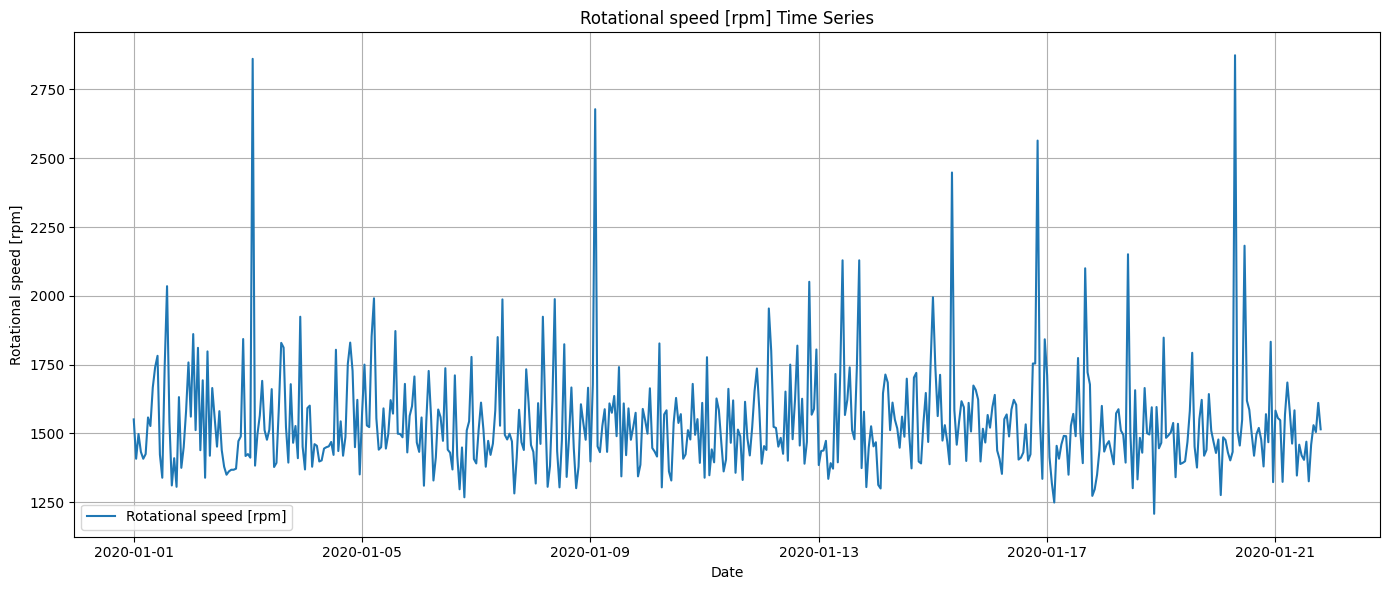


Sampling frequency: 24.00 samples/day


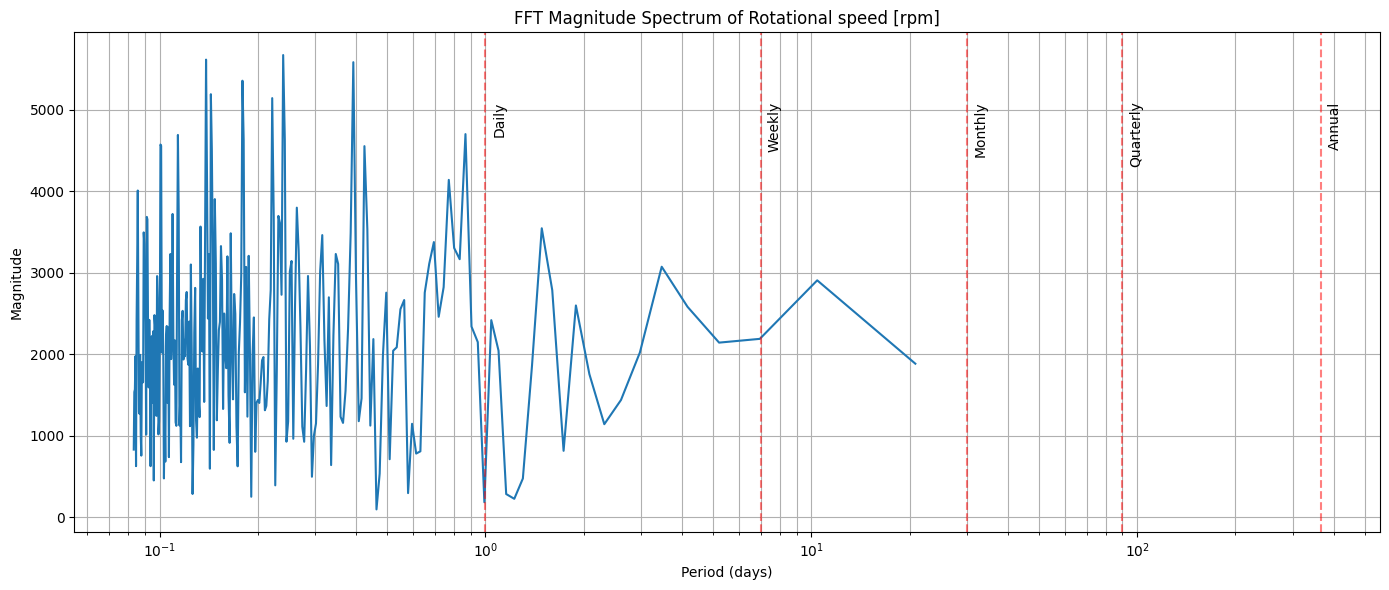


Dominant periods in Rotational speed [rpm]:
1. Period: 0.24 days, Magnitude: 5670.46
2. Period: 0.14 days, Magnitude: 5614.27
3. Period: 0.39 days, Magnitude: 5582.75
4. Period: 0.18 days, Magnitude: 5355.65
5. Period: 0.14 days, Magnitude: 5190.06


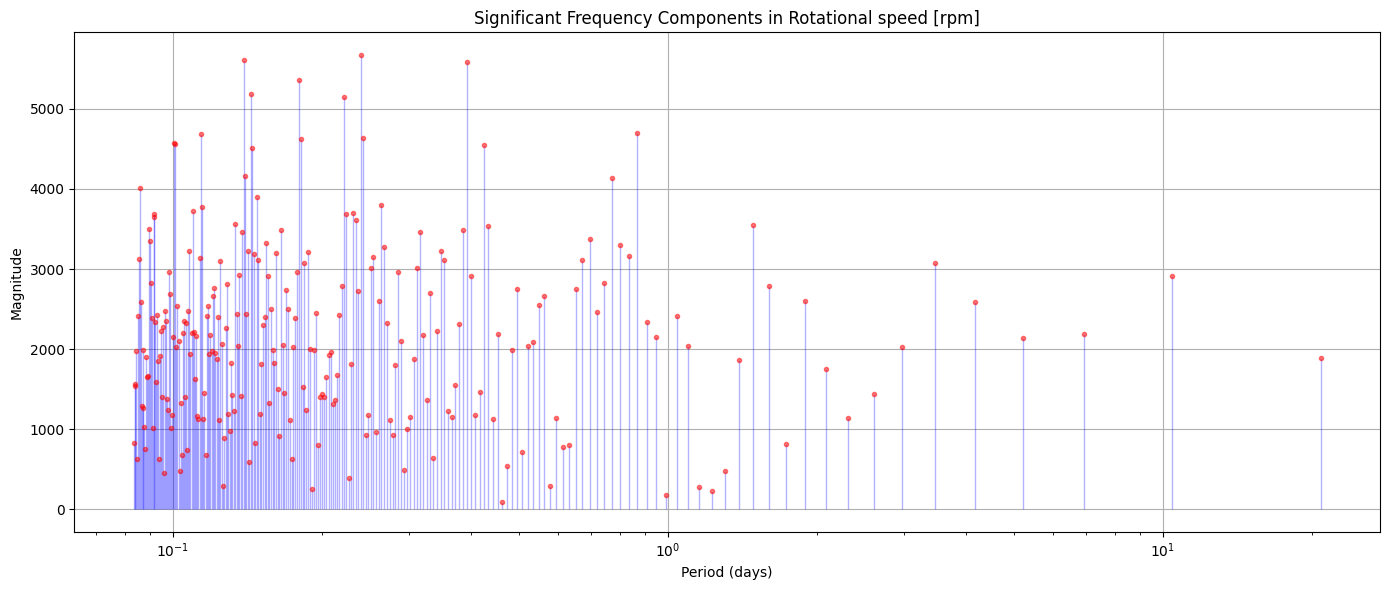

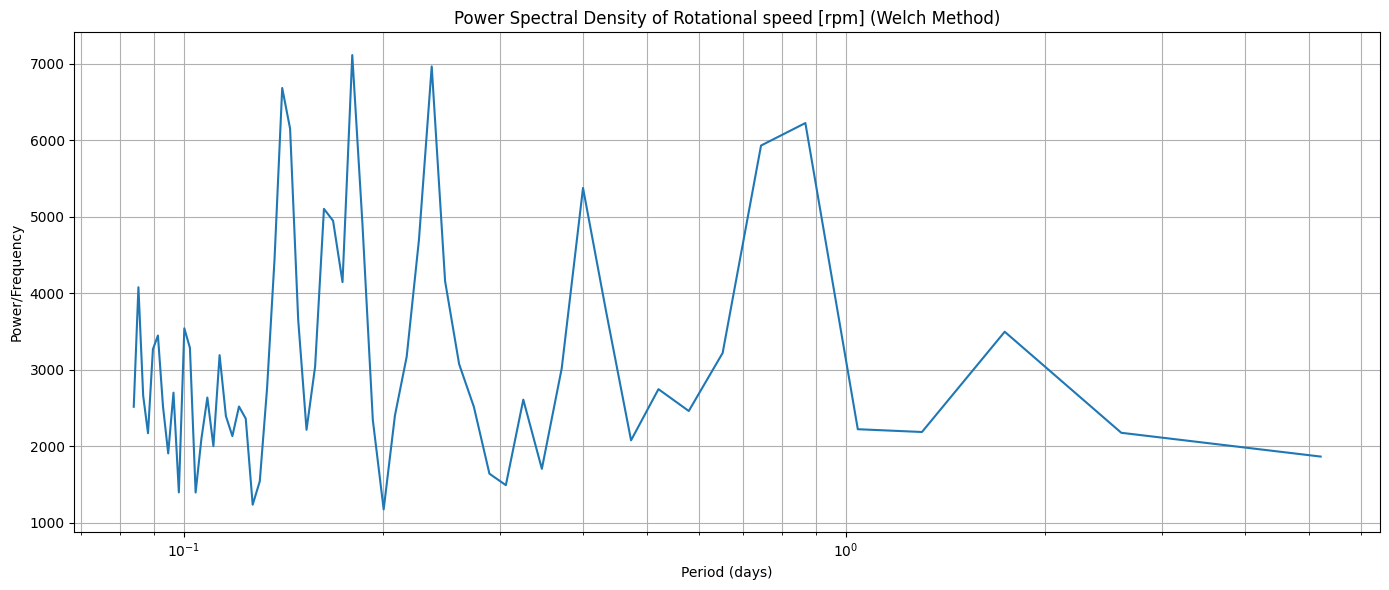


Failure Type Analysis:
Failure Type
No Failure            467
Tool Wear Failure      19
Overstrain Failure      8
Power Failure           6
Name: count, dtype: int64


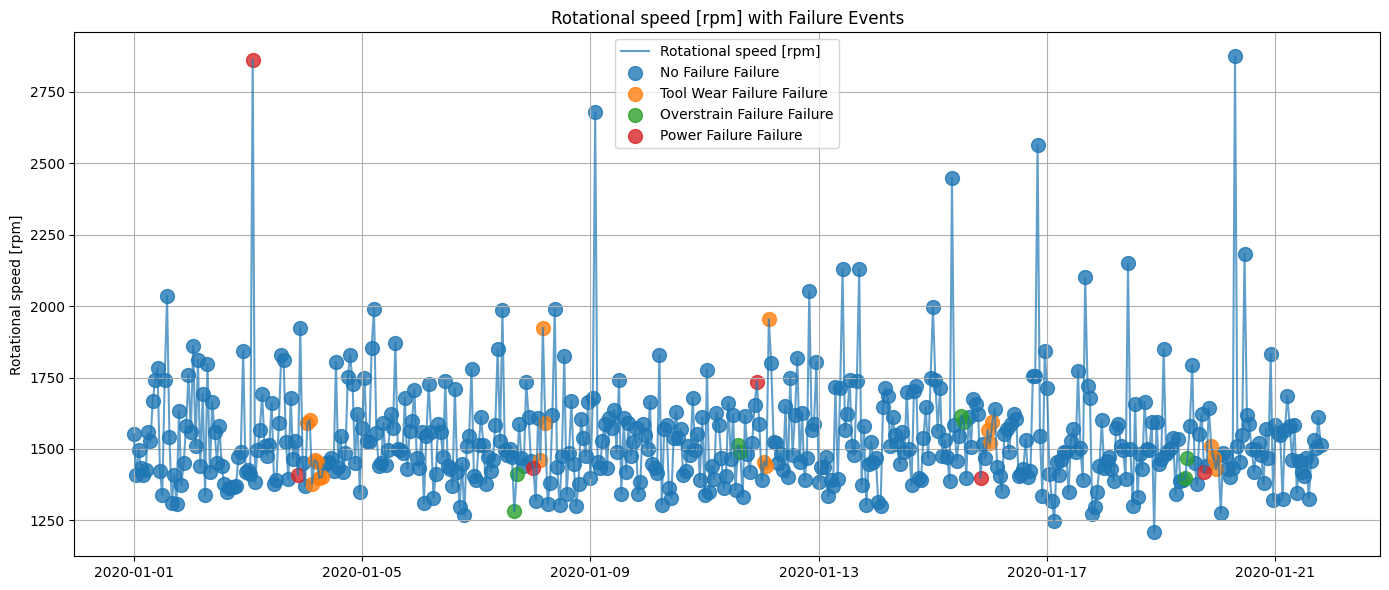

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# Set your target column (change this to your desired measurement)
target_column = 'Rotational speed [rpm]'  # Options: 'Air temperature [K]', 'Torque [Nm]', etc.

# 1. First ensure we have a datetime index - if not, create synthetic one
if not isinstance(df.index, pd.DatetimeIndex):
    print("Creating synthetic datetime index...")
    df = df.reset_index(drop=True)
    df.index = pd.date_range(start='2020-01-01', periods=len(df), freq='H')  # Hourly frequency

# 2. Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(df.index, df[target_column], label=target_column)
plt.title(f'{target_column} Time Series')
plt.ylabel(target_column)
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 3. FFT Analysis Preparation
signal_values = df[target_column].values

# Calculate sampling frequency (in samples/day)
time_diff = df.index.to_series().diff().median().total_seconds()
fs = 1 / (time_diff / 86400)  # Convert to samples per day
print(f"\nSampling frequency: {fs:.2f} samples/day")

# Detrend the data
signal_detrended = signal_values - np.mean(signal_values)

# Apply window function
window = signal.windows.hann(len(signal_detrended))
signal_windowed = signal_detrended * window

# 4. Perform FFT
fft_result = np.fft.rfft(signal_windowed)
fft_magnitude = np.abs(fft_result)
freq = np.fft.rfftfreq(len(signal_windowed), d=1/fs)
periods = 1/freq[1:]  # Skip DC component
magnitude = fft_magnitude[1:]  # Skip DC component

# 5. Plot FFT Spectrum
plt.figure(figsize=(14, 6))
plt.plot(periods, magnitude)
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.title(f'FFT Magnitude Spectrum of {target_column}')
plt.xlabel('Period (days)')
plt.ylabel('Magnitude')

# Add reference lines for common periods
common_periods = {
    'Daily': 1,
    'Weekly': 7,
    'Monthly': 30,
    'Quarterly': 90,
    'Annual': 365
}

for label, period in common_periods.items():
    plt.axvline(x=period, color='r', linestyle='--', alpha=0.5)
    plt.text(period*1.05, max(magnitude)*0.9, label, rotation=90, va='top')

plt.tight_layout()
plt.show()

# 6. Identify Dominant Frequencies
sorted_indices = np.argsort(magnitude)[::-1]  # Descending order
top_n = 5
top_indices = sorted_indices[:top_n]
top_periods = periods[top_indices]
top_magnitudes = magnitude[top_indices]

print(f"\nDominant periods in {target_column}:")
for i, (period, mag) in enumerate(zip(top_periods, top_magnitudes), 1):
    print(f"{i}. Period: {period:.2f} days, Magnitude: {mag:.2f}")

# 7. Highlight Peaks with Stem Plot
plt.figure(figsize=(14, 6))
markerline, stemlines, baseline = plt.stem(periods, magnitude, basefmt=" ")
plt.setp(stemlines, 'linewidth', 1, 'color', 'b', 'alpha', 0.3)
plt.setp(markerline, 'markersize', 3, 'color', 'r', 'alpha', 0.5)

# Highlight top periods
for period in top_periods:
    if 0.5 < period < 500:  # Reasonable range
        plt.axvline(x=period, color='green', linestyle='--', alpha=0.7)
        plt.text(period*1.05, max(magnitude)*0.8, f"{period:.1f}d", rotation=90)

plt.grid(True)
plt.xscale('log')
plt.title(f'Significant Frequency Components in {target_column}')
plt.xlabel('Period (days)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

# 8. Welch's Method for Power Spectral Density
f, Pxx = signal.welch(signal_detrended, fs=fs, nperseg=len(signal_detrended)//4)
periods_welch = 1/f[1:]  # Skip DC component
psd = Pxx[1:]  # Skip DC component

plt.figure(figsize=(14, 6))
plt.plot(periods_welch, psd)
plt.grid(True, which="both", ls="-")
plt.xscale('log')
plt.title(f'Power Spectral Density of {target_column} (Welch Method)')
plt.xlabel('Period (days)')
plt.ylabel('Power/Frequency')
plt.tight_layout()
plt.show()

# 9. Additional Analysis - Relationship with Failure Types
if 'Failure Type' in df.columns:
    print("\nFailure Type Analysis:")
    failure_counts = df['Failure Type'].value_counts()
    print(failure_counts)

    # Plot failures on time series
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df[target_column], label=target_column, alpha=0.7)

    for failure_type in failure_counts.index:
        failure_points = df[df['Failure Type'] == failure_type]
        plt.scatter(failure_points.index, failure_points[target_column],
                   label=f'{failure_type} Failure', s=100, alpha=0.8)

    plt.title(f'{target_column} with Failure Events')
    plt.ylabel(target_column)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
print(df.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Vibration Levels ', 'Operational Hours', 'Failure Type',
       'Rotational speed [rpm]_truncated', 'Rotational speed [rpm]_lowpass'],
      dtype='object')


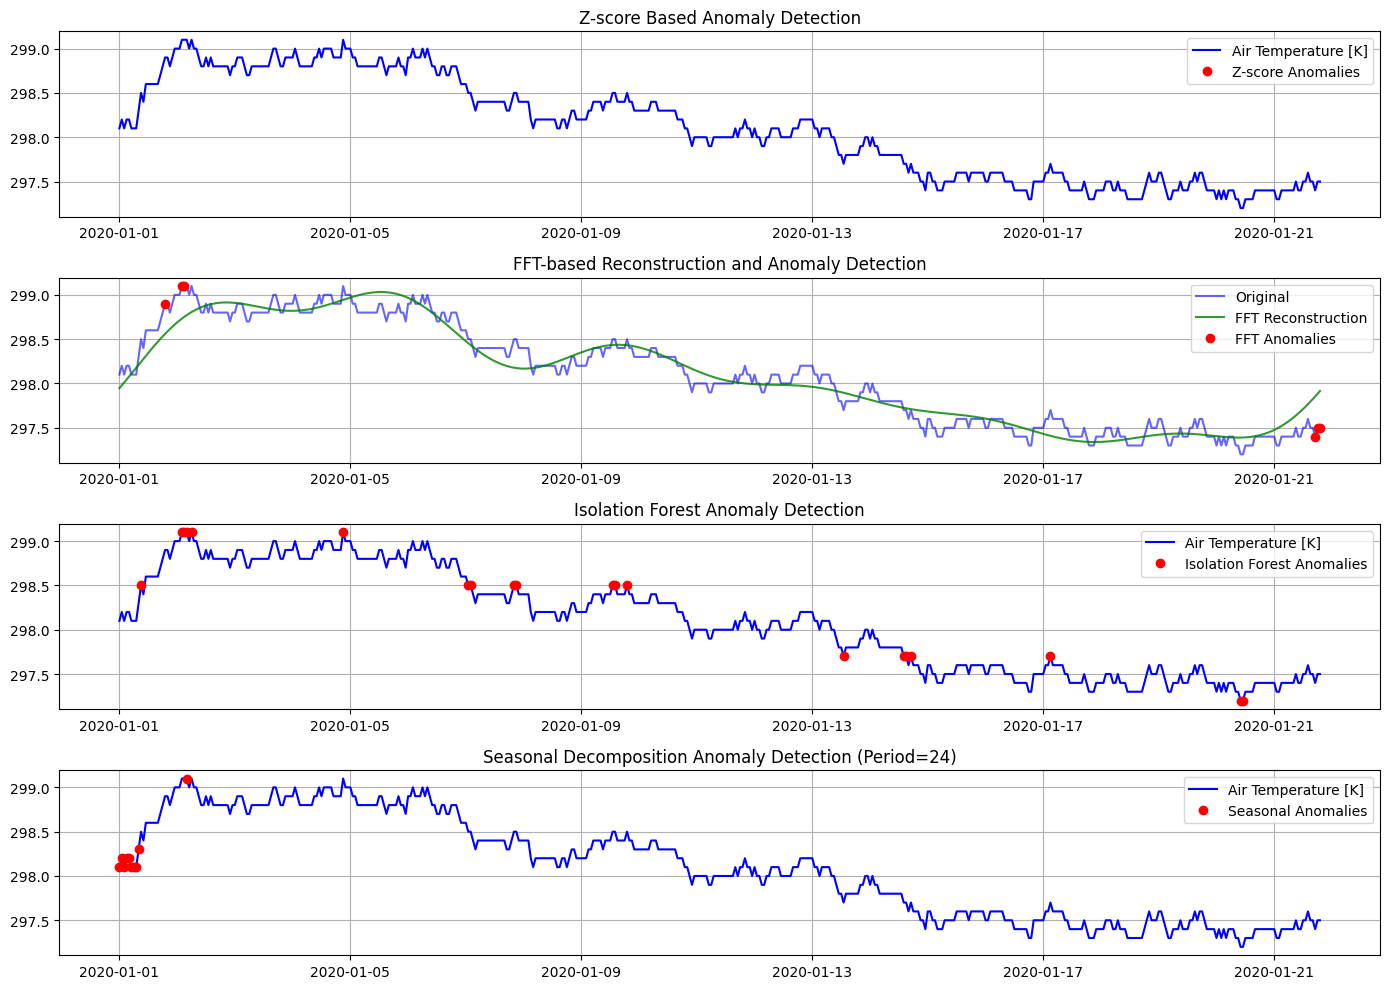

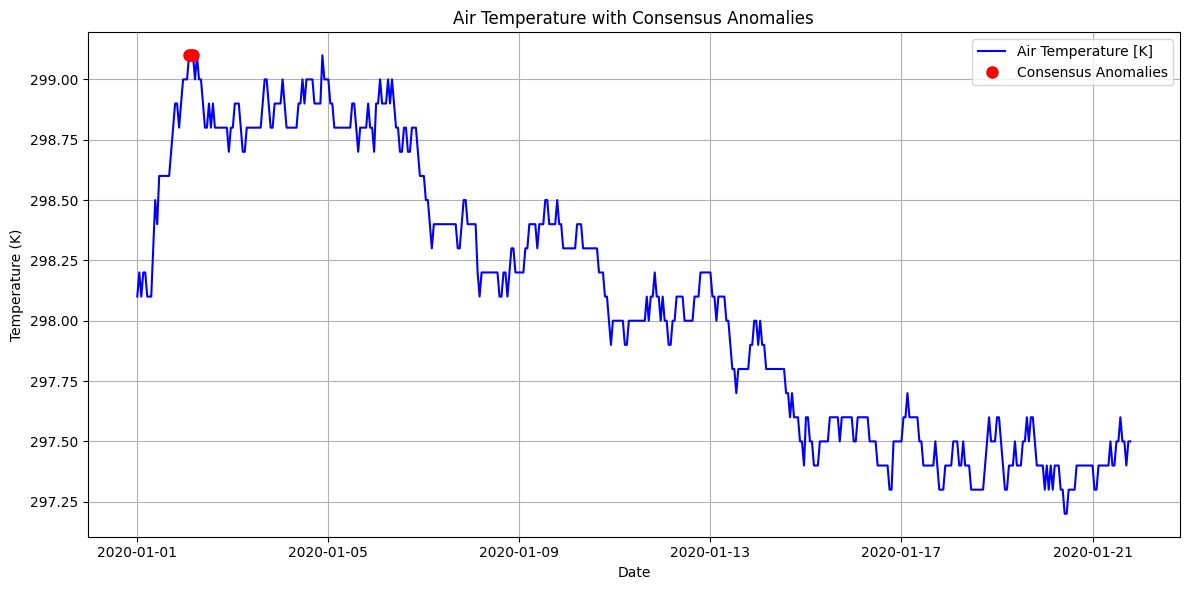

Total points analyzed: 500
Z-score anomalies: 0
FFT-based anomalies: 6
Isolation Forest anomalies: 20
Seasonal decomposition anomalies: 10
Consensus anomalies (≥2 methods): 3


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import zscore

# Assuming your DataFrame is named 'df' with datetime index
# If your index isn't datetime, you'll need to convert it first
# Example: df.index = pd.to_datetime(df.index)

# Method 1: Statistical approach - Z-score based anomaly detection
def detect_anomalies_zscore(data, threshold=3):
    """Detect anomalies using Z-score method."""
    z_scores = zscore(data)
    return np.abs(z_scores) > threshold

# Method 2: FFT-based reconstruction and residual analysis
def detect_anomalies_fft(data, num_components=10, threshold=2.5):
    """Detect anomalies by comparing original signal with FFT reconstruction."""
    fft_values = np.fft.rfft(data)
    frequencies = np.fft.rfftfreq(len(data))
    magnitudes = np.abs(fft_values)
    top_indices = np.argsort(magnitudes)[::-1][:num_components]
    filtered_fft = np.zeros_like(fft_values, dtype=complex)
    filtered_fft[top_indices] = fft_values[top_indices]
    reconstructed = np.fft.irfft(filtered_fft, n=len(data))
    residuals = data - reconstructed
    residual_mean = np.mean(residuals)
    residual_std = np.std(residuals)
    return np.abs(residuals - residual_mean) > threshold * residual_std, reconstructed, residuals

# Method 3: Isolation Forest (machine learning approach)
def detect_anomalies_iforest(data, contamination=0.05):
    """Detect anomalies using Isolation Forest."""
    reshaped_data = data.reshape(-1, 1)
    model = IsolationForest(contamination=contamination, random_state=42)
    model.fit(reshaped_data)
    predictions = model.predict(reshaped_data)
    return predictions == -1

# Method 4: Seasonal decomposition and residual analysis
def detect_anomalies_seasonal(data, index, period=None, threshold=2.5):
    """Detect anomalies using seasonal decomposition."""
    ts = pd.Series(data, index=index)

    if period is None:
        fft_values = np.fft.rfft(data)
        frequencies = np.fft.rfftfreq(len(data))
        magnitudes = np.abs(fft_values)
        max_idx = np.argmax(magnitudes[1:]) + 1
        period = int(1 / frequencies[max_idx])
        print(f"Estimated period from FFT: {period}")

    decomposition = seasonal_decompose(ts, period=period, extrapolate_trend='freq')
    residuals = decomposition.resid
    residual_mean = residuals.mean()
    residual_std = residuals.std()
    anomalies = np.abs(residuals - residual_mean) > threshold * residual_std
    return anomalies, decomposition

# Apply to your air temperature data
temp_data = df['Air temperature [K]'].values
dates = df.index  # Make sure this is a datetime index

# If you want to use the lowpass filtered version instead:
# temp_data = df['Rotational speed [rpm]_lowpass'].values

# Estimate fundamental period (you can adjust this based on your data)
fundamental_period = 24  # Assuming daily cycles (change based on your data)

# 1. Z-score method
zscore_anomalies = detect_anomalies_zscore(temp_data, threshold=3)

# 2. FFT-based method
fft_anomalies, reconstructed, residuals = detect_anomalies_fft(
    temp_data, num_components=6, threshold=2.5)

# 3. Isolation Forest
iforest_anomalies = detect_anomalies_iforest(temp_data, contamination=0.05)

# 4. Seasonal decomposition
period_approx = int(round(fundamental_period))
seasonal_anomalies, decomposition = detect_anomalies_seasonal(
    temp_data, dates, period=period_approx, threshold=2.5)

# Visualization of anomalies detected by each method
plt.figure(figsize=(14, 10))

# Original data with Z-score anomalies
plt.subplot(4, 1, 1)
plt.plot(dates, temp_data, 'b-', label='Air Temperature [K]')
plt.plot(dates[zscore_anomalies], temp_data[zscore_anomalies], 'ro', label='Z-score Anomalies')
plt.title('Z-score Based Anomaly Detection')
plt.legend()
plt.grid(True)

# FFT reconstruction and anomalies
plt.subplot(4, 1, 2)
plt.plot(dates, temp_data, 'b-', alpha=0.6, label='Original')
plt.plot(dates, reconstructed, 'g-', alpha=0.8, label='FFT Reconstruction')
plt.plot(dates[fft_anomalies], temp_data[fft_anomalies], 'ro', label='FFT Anomalies')
plt.title('FFT-based Reconstruction and Anomaly Detection')
plt.legend()
plt.grid(True)

# Isolation Forest anomalies
plt.subplot(4, 1, 3)
plt.plot(dates, temp_data, 'b-', label='Air Temperature [K]')
plt.plot(dates[iforest_anomalies], temp_data[iforest_anomalies], 'ro', label='Isolation Forest Anomalies')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()
plt.grid(True)

# Seasonal decomposition anomalies
plt.subplot(4, 1, 4)
plt.plot(dates, temp_data, 'b-', label='Air Temperature [K]')
plt.plot(dates[seasonal_anomalies], temp_data[seasonal_anomalies], 'ro', label='Seasonal Anomalies')
plt.title(f'Seasonal Decomposition Anomaly Detection (Period={period_approx})')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Compare the anomalies detected by different methods
combined_anomalies = pd.DataFrame({
    'Z-score': zscore_anomalies,
    'FFT': fft_anomalies,
    'Isolation Forest': iforest_anomalies,
    'Seasonal': seasonal_anomalies
}, index=dates)

# Count how many methods detected each point as an anomaly
agreement_count = combined_anomalies.sum(axis=1)

# Points flagged by multiple methods are more likely to be true anomalies
consensus_anomalies = agreement_count >= 2  # At least 2 methods agree

# Final visualization with consensus anomalies
plt.figure(figsize=(12, 6))
plt.plot(dates, temp_data, 'b-', label='Air Temperature [K]')
plt.plot(dates[consensus_anomalies], temp_data[consensus_anomalies],
         'ro', markersize=8, label='Consensus Anomalies')
plt.title('Air Temperature with Consensus Anomalies')
plt.xlabel('Date')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary of anomalies
print(f"Total points analyzed: {len(temp_data)}")
print(f"Z-score anomalies: {sum(zscore_anomalies)}")
print(f"FFT-based anomalies: {sum(fft_anomalies)}")
print(f"Isolation Forest anomalies: {sum(iforest_anomalies)}")
print(f"Seasonal decomposition anomalies: {sum(seasonal_anomalies)}")
print(f"Consensus anomalies (≥2 methods): {sum(consensus_anomalies)}")


Analyzing Air temperature [K]...


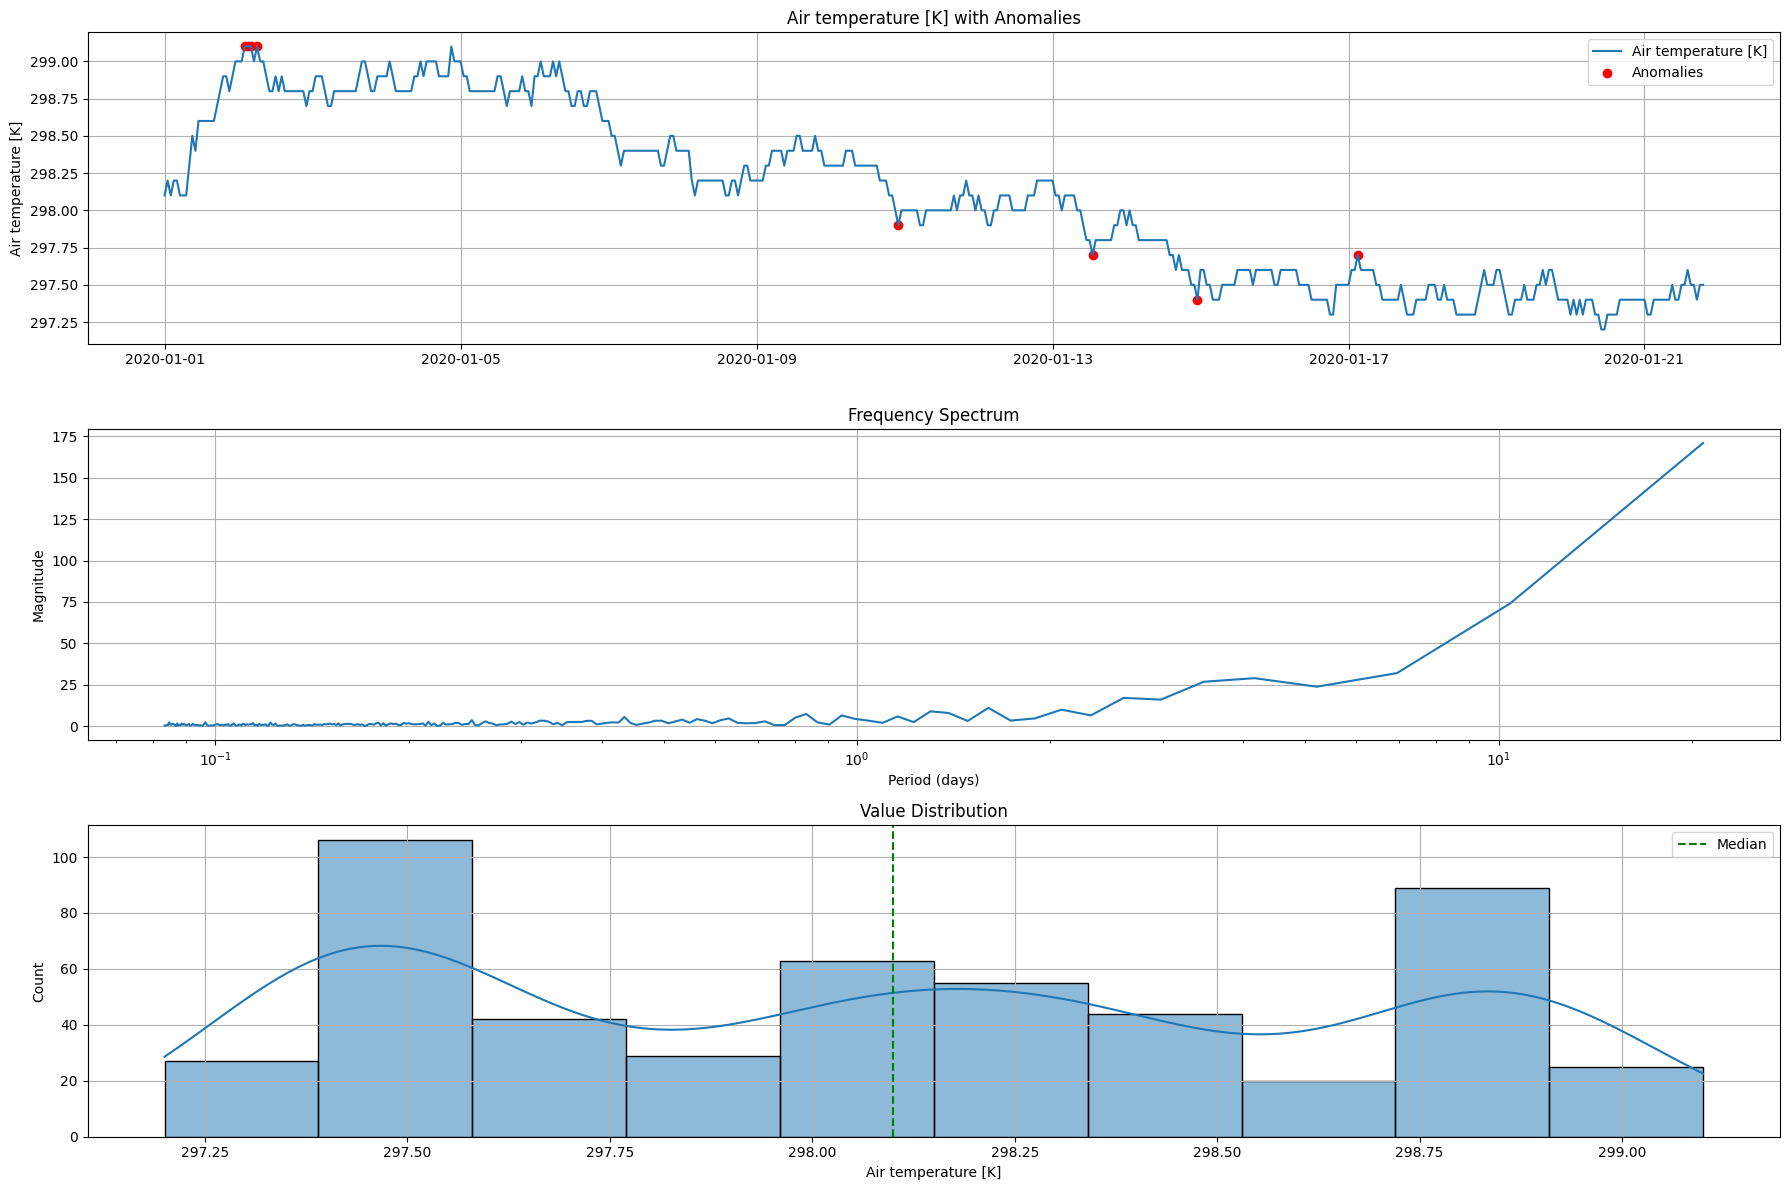

Detected 8 anomalies (1.60%)

Analyzing Process temperature [K]...


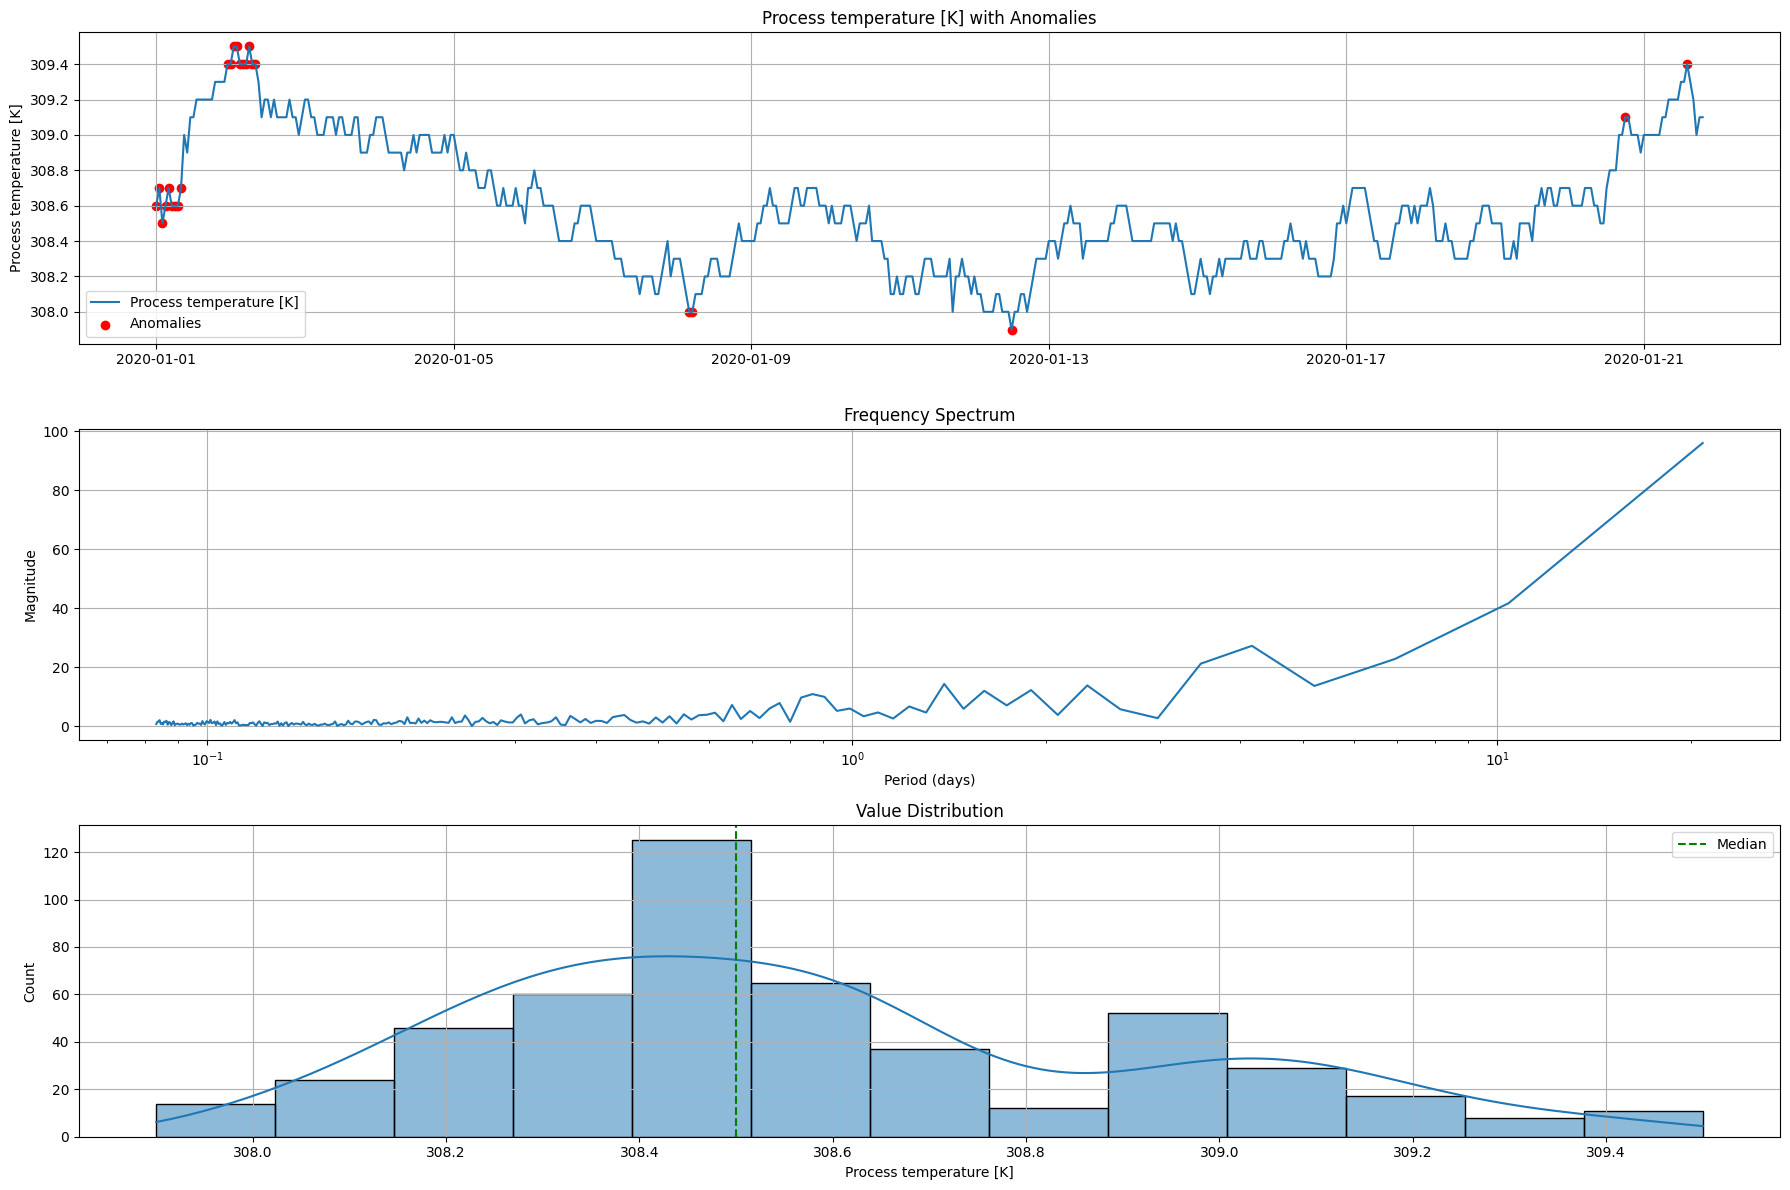

Detected 24 anomalies (4.80%)

Analyzing Rotational speed [rpm]...


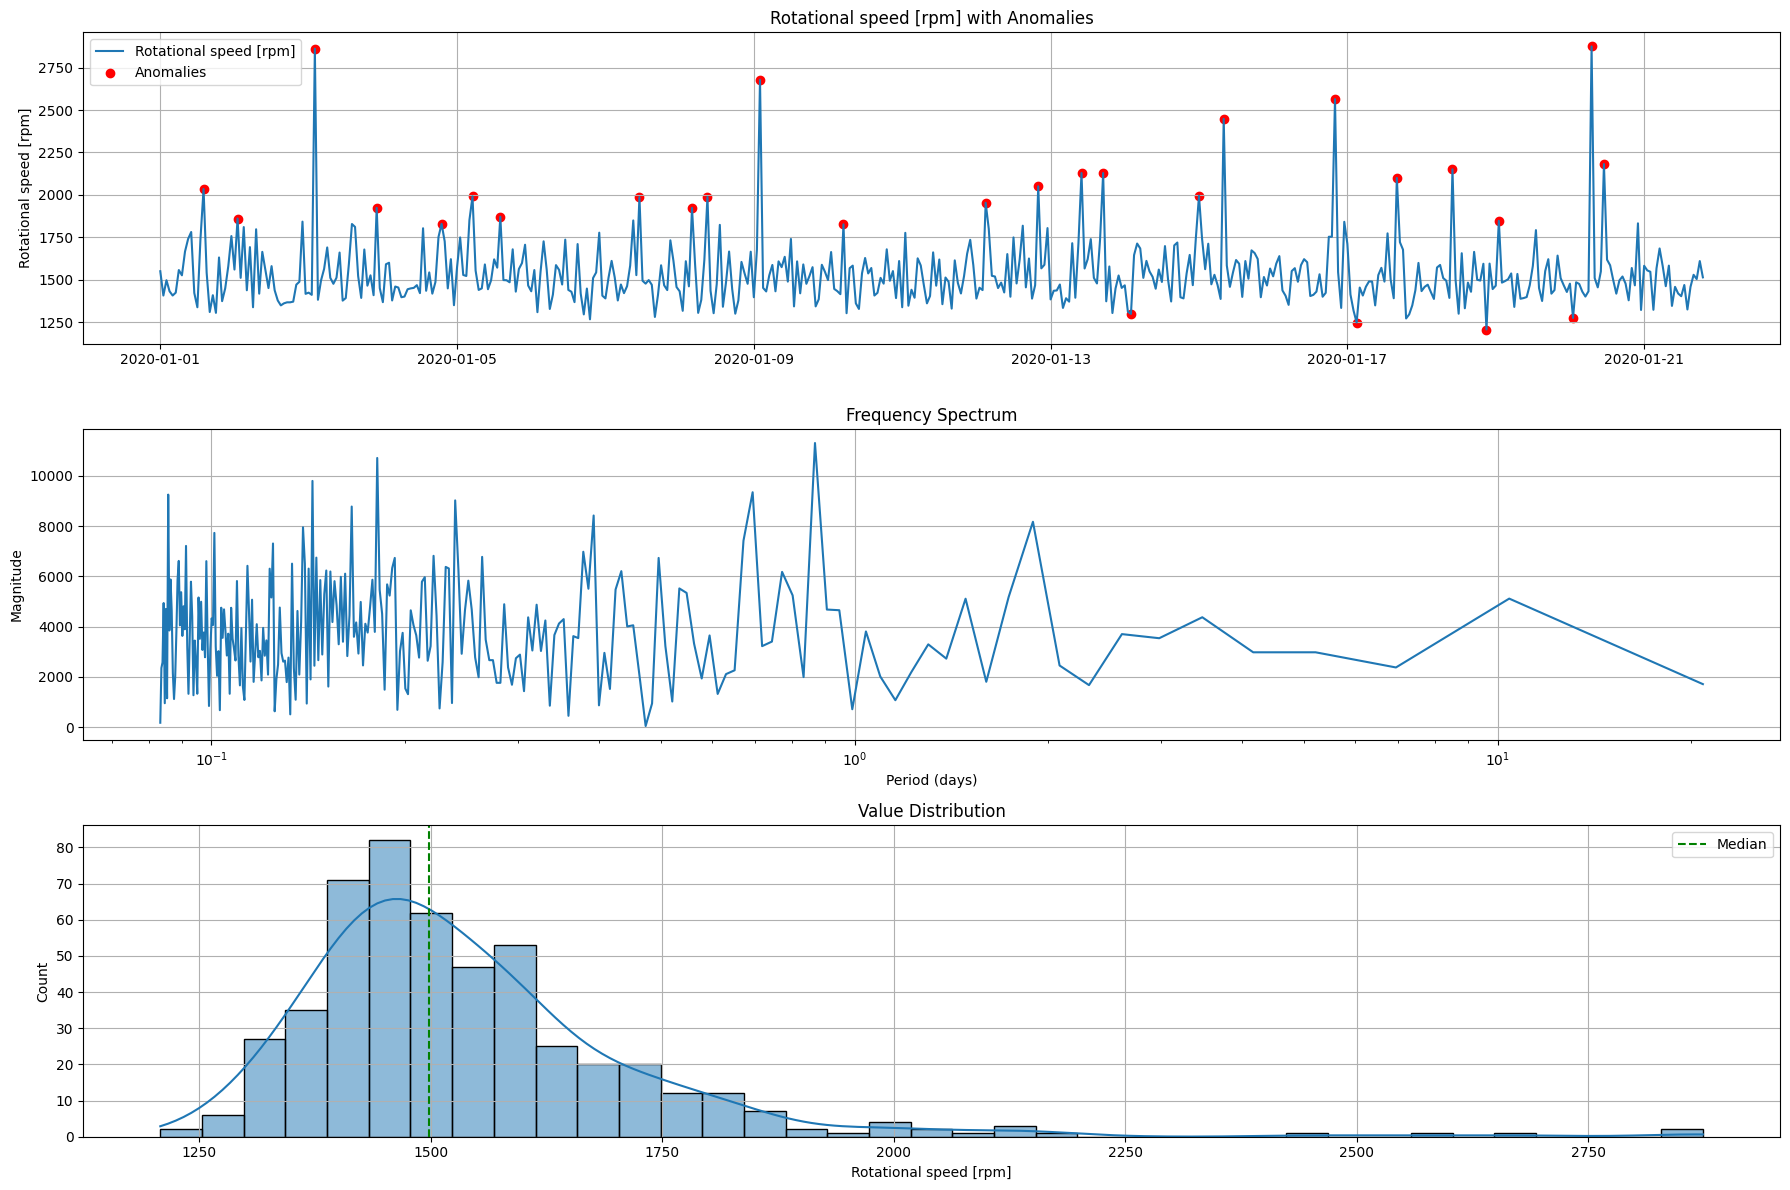

Detected 28 anomalies (5.60%)

Analyzing Torque [Nm]...


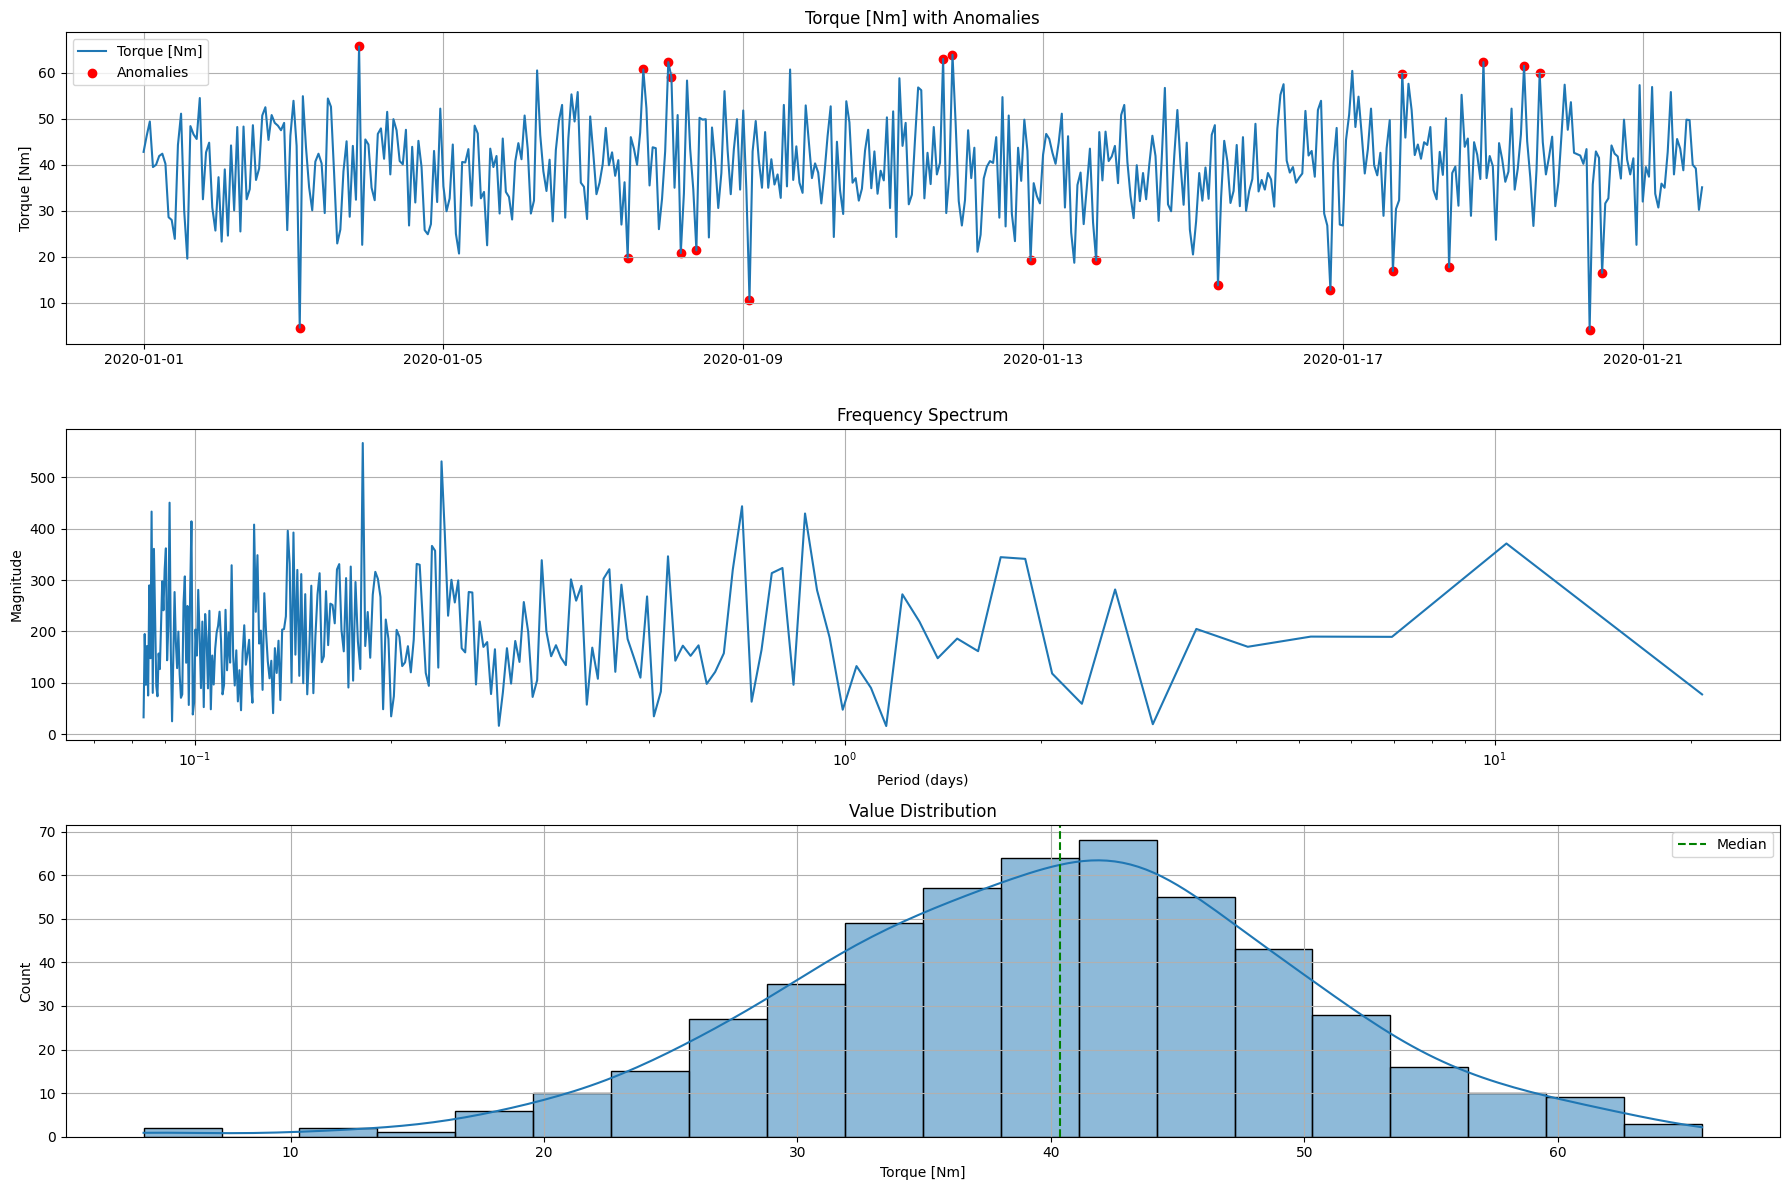

Detected 23 anomalies (4.60%)

Analyzing Vibration Levels ...


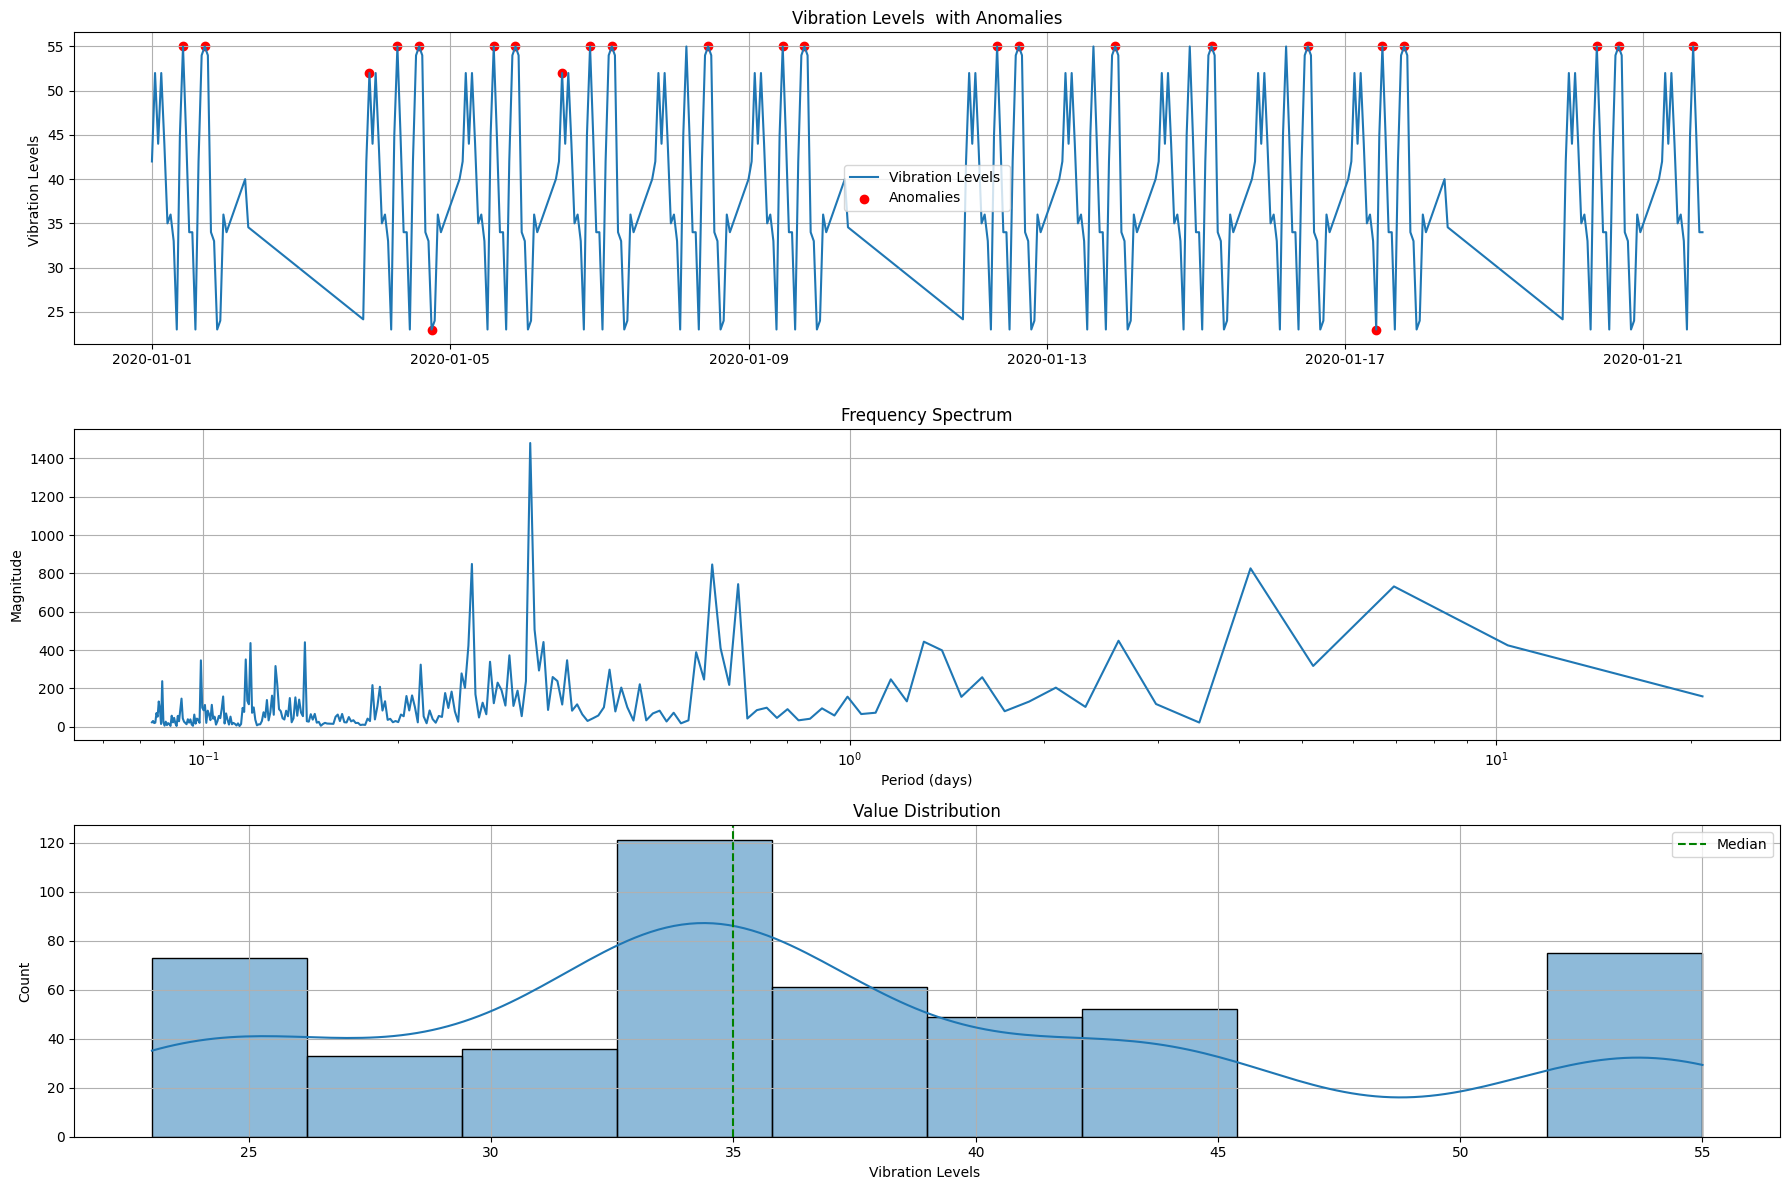

Detected 25 anomalies (5.00%)

Total system-wide anomalies: 23


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from scipy import stats, signal
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# List of all sensor columns to analyze
sensor_columns = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Vibration Levels '
]

# 1. Data Preparation
def prepare_data(df):
    """Ensure datetime index and handle missing values"""
    if not isinstance(df.index, pd.DatetimeIndex):
        print("Creating synthetic datetime index...")
        df = df.reset_index(drop=True)
        df.index = pd.date_range(start='2020-01-01', periods=len(df), freq='H')

    # Forward fill missing values (simple imputation)
    df[sensor_columns] = df[sensor_columns].ffill().bfill()
    return df

# 2. Multi-Method Anomaly Detection
def detect_anomalies(df, target_column):
    """Apply multiple anomaly detection methods to a column"""
    results = {}

    # Robust Z-score method
    median = np.median(df[target_column])
    mad = stats.median_abs_deviation(df[target_column])
    robust_z = 0.6745 * (df[target_column] - median) / mad
    results['z_anomaly'] = abs(robust_z) > 3

    # Isolation Forest
    model = IsolationForest(contamination=0.05, random_state=42)
    preds = model.fit_predict(df[[target_column]])
    results['if_anomaly'] = preds == -1

    # Seasonal decomposition (if enough data)
    if len(df) > 100:
        try:
            decomposition = seasonal_decompose(df[target_column], period=24, extrapolate_trend='freq')
            resid = decomposition.resid
            resid_mad = stats.median_abs_deviation(resid.dropna())
            results['seasonal_anomaly'] = abs(resid) > (3 * resid_mad)
        except:
            results['seasonal_anomaly'] = pd.Series(False, index=df.index)

    # FFT-based reconstruction
    try:
        fft_values = np.fft.rfft(df[target_column])
        top_indices = np.argsort(np.abs(fft_values))[::-1][:5]
        filtered_fft = np.zeros_like(fft_values)
        filtered_fft[top_indices] = fft_values[top_indices]
        reconstructed = np.fft.irfft(filtered_fft, n=len(df))
        residuals = df[target_column] - reconstructed
        results['fft_anomaly'] = abs(residuals) > (3 * stats.median_abs_deviation(residuals))
    except:
        results['fft_anomaly'] = pd.Series(False, index=df.index)

    # Combine results (at least 2 methods must agree)
    anomaly_df = pd.DataFrame(results)
    combined_anomalies = anomaly_df.sum(axis=1) >= 2
    return combined_anomalies

# 3. Frequency Analysis
def analyze_frequencies(df, target_column):
    """Perform FFT analysis on a column"""
    signal_values = df[target_column].values
    fs = 1 / (df.index.to_series().diff().median().total_seconds() / 86400)

    # FFT
    fft_result = np.fft.rfft(signal_values - np.mean(signal_values))
    freq = np.fft.rfftfreq(len(signal_values), d=1/fs)
    periods = 1/freq[1:]
    magnitude = np.abs(fft_result)[1:]

    return periods, magnitude

# 4. Visualization
def plot_analysis(df, target_column, anomalies):
    """Create comprehensive visualization for a column"""
    plt.figure(figsize=(18, 12))

    # Time series with anomalies
    plt.subplot(3, 1, 1)
    plt.plot(df.index, df[target_column], label=target_column)
    plt.scatter(df.index[anomalies], df[target_column][anomalies],
               color='red', label='Anomalies')
    plt.title(f'{target_column} with Anomalies')
    plt.ylabel(target_column)
    plt.legend()
    plt.grid(True)

    # FFT spectrum
    periods, magnitude = analyze_frequencies(df, target_column)
    plt.subplot(3, 1, 2)
    plt.plot(periods, magnitude)
    plt.xscale('log')
    plt.title('Frequency Spectrum')
    plt.xlabel('Period (days)')
    plt.ylabel('Magnitude')
    plt.grid(True)

    # Distribution plot
    plt.subplot(3, 1, 3)
    sns.histplot(df[target_column], kde=True)
    plt.axvline(np.median(df[target_column]), color='green', linestyle='--', label='Median')
    plt.title('Value Distribution')
    plt.xlabel(target_column)
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Main Analysis Pipeline
def analyze_all_columns(df):
    """Run full analysis on all sensor columns"""
    df = prepare_data(df)

    # Create a DataFrame to store all anomaly results
    all_anomalies = pd.DataFrame(index=df.index)

    for col in sensor_columns:
        print(f"\nAnalyzing {col}...")
        anomalies = detect_anomalies(df, col)
        all_anomalies[col] = anomalies
        plot_analysis(df, col, anomalies)

        # Print summary stats
        print(f"Detected {sum(anomalies)} anomalies ({sum(anomalies)/len(df):.2%})")

    # Combine anomalies across all columns
    all_anomalies['combined_anomaly'] = all_anomalies.sum(axis=1) >= 2
    print(f"\nTotal system-wide anomalies: {sum(all_anomalies['combined_anomaly'])}")

    return all_anomalies

# Run the analysis
anomaly_results = analyze_all_columns(df)

# Optional: Save results
anomaly_results.to_csv('anomaly_detection_results.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
df = pd.read_csv('/content/CIA-1 Dataset - Dataset (1).csv')

# Feature engineering
df['temp_difference'] = df['Process temperature [K]'] - df['Air temperature [K]']
df['power'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']
df['vibration_to_speed'] = df['Vibration Levels '] / (df['Rotational speed [rpm]'] + 0.001)  # Avoid division by zero

# Convert failure type to numerical categories
failure_mapping = {
    'No Failure': 0,
    'Heat Dissipation Failure': 1,
    'Power Failure': 2,
    'Overstrain Failure': 3,
    'Tool Wear Failure': 4,
    'Random Failures': 5
}
df['failure_encoded'] = df['Failure Type'].map(failure_mapping)

# Select features and target
features = [
    'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
    'Torque [Nm]', 'Vibration Levels ', 'temp_difference', 'power',
    'vibration_to_speed', 'Operational Hours'
]
X = df[features]
y = df['failure_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Vibration Levels ', 'Operational Hours', 'Failure Type']
Classification Report:
                    precision    recall  f1-score   support

        No Failure       0.93      1.00      0.96        93
Overstrain Failure       0.00      0.00      0.00         2
     Power Failure       0.00      0.00      0.00         1
 Tool Wear Failure       0.00      0.00      0.00         4

          accuracy                           0.93       100
         macro avg       0.23      0.25      0.24       100
      weighted avg       0.86      0.93      0.90       100



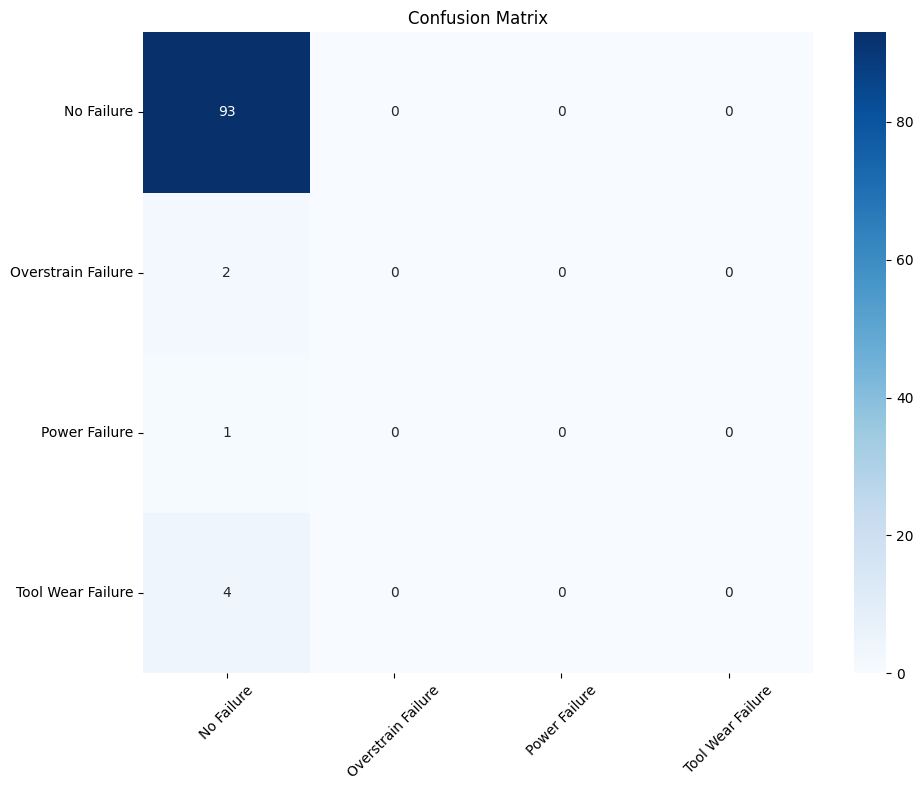


Predictions for New Machines:
   Operational Hours Predicted Failure  Confidence
0                100        No Failure    0.598368
1                200        No Failure    0.670424
2                300        No Failure    0.649908
3                400        No Failure    0.573935


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
df = pd.read_csv('/content/CIA-1 Dataset - Dataset (1).csv')

# Shuffle the DataFrame instead
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
print(df.columns.tolist())



# Feature engineering
df['temp_difference'] = df['Process temperature [K]'] - df['Air temperature [K]']
df['power'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']
df['vibration_to_speed'] = df['Vibration Levels '] / (df['Rotational speed [rpm]'] + 0.001)

# Convert failure type to numerical categories with consistent mapping
failure_types = sorted(df['Failure Type'].unique())
failure_mapping = {failure: idx for idx, failure in enumerate(failure_types)}
df['failure_encoded'] = df['Failure Type'].map(failure_mapping)

# Select features and target
features = [
    'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
    'Torque [Nm]', 'Vibration Levels ', 'temp_difference', 'power',
    'vibration_to_speed', 'Operational Hours'
]
X = df[features]
y = df['failure_encoded']

# Split data - stratify to ensure all classes are represented
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest classifier
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Get all possible classes the model was trained on
all_classes = np.arange(len(failure_types))
y_pred = model.predict(X_test_scaled)

# FIXED Classification Report
print("Classification Report:")
print(classification_report(
    y_test,
    y_pred,
    labels=all_classes,
    target_names=failure_types,
    zero_division=0
))

# Confusion matrix with all classes
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred, labels=all_classes)
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=failure_types,
            yticklabels=failure_types,
            cmap='Blues')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Generate synthetic new machine data for testing
new_machine_data = {
    'Air temperature [K]': [300, 305, 310, 315],
    'Process temperature [K]': [310, 315, 320, 325],
    'Rotational speed [rpm]': [1500, 1600, 1700, 1800],
    'Torque [Nm]': [40, 45, 50, 55],
    'Vibration Levels ': [5, 6, 7, 8],
    'Operational Hours': [100, 200, 300, 400]
}

# Create DataFrame and add engineered features
new_machines = pd.DataFrame(new_machine_data)
new_machines['temp_difference'] = new_machines['Process temperature [K]'] - new_machines['Air temperature [K]']
new_machines['power'] = new_machines['Torque [Nm]'] * new_machines['Rotational speed [rpm]']
new_machines['vibration_to_speed'] = new_machines['Vibration Levels '] / (new_machines['Rotational speed [rpm]'] + 0.001)

# Scale features and predict
X_new = new_machines[features]
X_new_scaled = scaler.transform(X_new)
predictions = model.predict(X_new_scaled)
probabilities = model.predict_proba(X_new_scaled)

# Convert predictions back to failure types
predicted_failures = [failure_types[pred] for pred in predictions]

# Create results with confidence
results = new_machines.copy()
results['Predicted Failure'] = predicted_failures
results['Confidence'] = np.max(probabilities, axis=1)

print("\nPredictions for New Machines:")
print(results[['Operational Hours', 'Predicted Failure', 'Confidence']])

In [ ]:
# Generate synthetic new machine data
new_machine_data = {
    'Air temperature [K]': [300, 305, 310, 299],  # Increasing temp
    'Process temperature [K]': [310, 315, 320, 309.1],
    'Rotational speed [rpm]': [1500, 1600, 1700, 1592],
    'Torque [Nm]': [40, 45, 50, 35],
    'Vibration Levels ': [5, 6, 7, 44],  # Increasing vibration
    'Operational Hours': [100, 200, 300, 55.00]
}

# Create DataFrame and add engineered features
new_machines = pd.DataFrame(new_machine_data)
new_machines['temp_difference'] = new_machines['Process temperature [K]'] - new_machines['Air temperature [K]']
new_machines['power'] = new_machines['Torque [Nm]'] * new_machines['Rotational speed [rpm]']
new_machines['vibration_to_speed'] = new_machines['Vibration Levels '] / (new_machines['Rotational speed [rpm]'] + 0.001)

# Scale features
X_new = new_machines[features]
X_new_scaled = scaler.transform(X_new)

In [ ]:
# Make predictions
predictions = model.predict(X_new_scaled)
probabilities = model.predict_proba(X_new_scaled)

# Convert predictions back to failure types
reverse_mapping = {v: k for k, v in failure_mapping.items()}
predicted_failures = [reverse_mapping[pred] for pred in predictions]

# Create results DataFrame
results = new_machines.copy()
results['Predicted Failure'] = predicted_failures
results['Confidence'] = np.max(probabilities, axis=1)

# Display results with confidence
print("\nPrediction Results for New Machines:")
for i, row in results.iterrows():
    print(f"Machine {i+1}:")
    print(f"  Operational Hours: {row['Operational Hours']}")
    print(f"  Predicted Failure: {row['Predicted Failure']}")
    print(f"  Confidence: {row['Confidence']:.2%}")
    print(f"  Details:")
    print(f"  - Air Temp: {row['Air temperature [K]']}K")
    print(f"  - Process Temp: {row['Process temperature [K]']}K")
    print(f"  - Vibration: {row['Vibration Levels ']}")
    print("-" * 40)


Prediction Results for New Machines:
Machine 1:
  Operational Hours: 100.0
  Predicted Failure: No Failure
  Confidence: 59.84%
  Details:
  - Air Temp: 300K
  - Process Temp: 310.0K
  - Vibration: 5
----------------------------------------
Machine 2:
  Operational Hours: 200.0
  Predicted Failure: No Failure
  Confidence: 67.04%
  Details:
  - Air Temp: 305K
  - Process Temp: 315.0K
  - Vibration: 6
----------------------------------------
Machine 3:
  Operational Hours: 300.0
  Predicted Failure: No Failure
  Confidence: 64.99%
  Details:
  - Air Temp: 310K
  - Process Temp: 320.0K
  - Vibration: 7
----------------------------------------
Machine 4:
  Operational Hours: 55.0
  Predicted Failure: Tool Wear Failure
  Confidence: 73.44%
  Details:
  - Air Temp: 299K
  - Process Temp: 309.1K
  - Vibration: 44
----------------------------------------


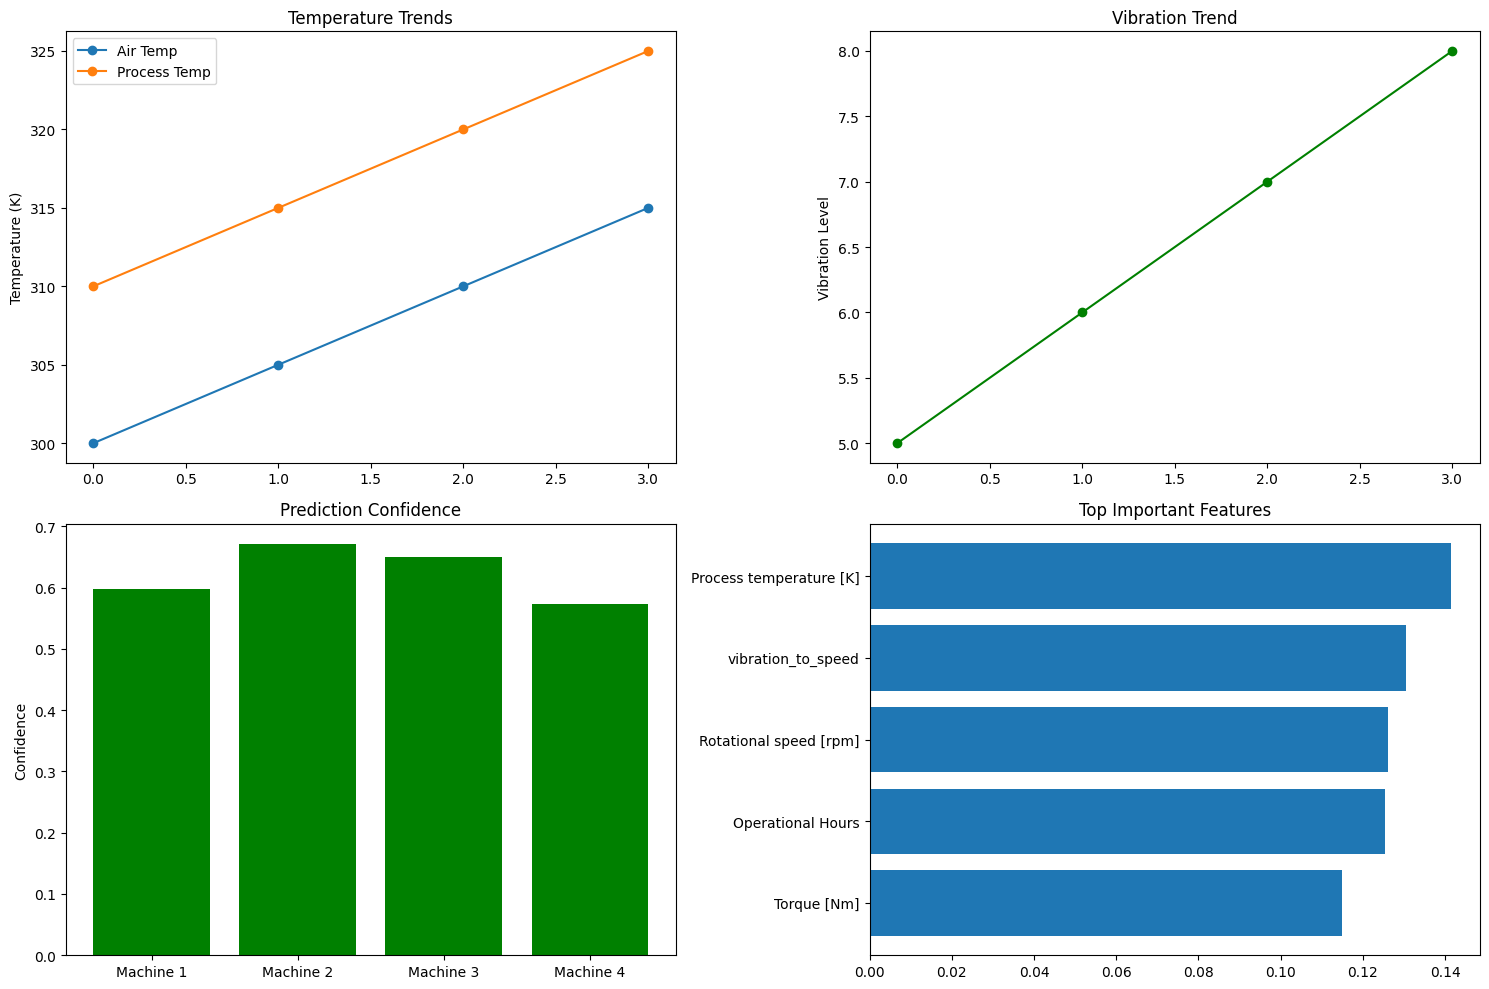

In [ ]:
# Plot feature trends for new machines
plt.figure(figsize=(15, 10))

# Temperature plot
plt.subplot(2, 2, 1)
plt.plot(results['Air temperature [K]'], label='Air Temp', marker='o')
plt.plot(results['Process temperature [K]'], label='Process Temp', marker='o')
plt.title('Temperature Trends')
plt.ylabel('Temperature (K)')
plt.legend()

# Vibration plot
plt.subplot(2, 2, 2)
plt.plot(results['Vibration Levels '], label='Vibration', marker='o', color='green')
plt.title('Vibration Trend')
plt.ylabel('Vibration Level')

# Failure prediction
plt.subplot(2, 2, 3)
colors = ['green' if f == 'No Failure' else 'red' for f in results['Predicted Failure']]
plt.bar(range(len(results)), results['Confidence'], color=colors)
plt.title('Prediction Confidence')
plt.ylabel('Confidence')
plt.xticks(range(len(results)), [f"Machine {i+1}" for i in range(len(results))])

# Feature importance
plt.subplot(2, 2, 4)
importances = model.feature_importances_
sorted_idx = np.argsort(importances)[-5:]  # Top 5 features
plt.barh(np.array(features)[sorted_idx], importances[sorted_idx])
plt.title('Top Important Features')

plt.tight_layout()
plt.show()

In [ ]:
from joblib import dump

# Save the failure prediction model
dump(model, 'failure_model.joblib')

# Save the scaler and feature names
dump(scaler, 'scaler.joblib')
dump(features, 'features.joblib')  # The list of features you used

['features.joblib']

In [ ]:
# Convert index to datetime (if it's not already)
df.index = pd.to_datetime(df.index)

# Now compute sampling frequency (fs)
time_diffs = df.index.to_series().diff().dt.total_seconds()  # Time differences in seconds
fs = 1 / time_diffs.median()  # Sampling frequency in Hz
print(f"Sampling frequency: {fs} Hz")

Sampling frequency: 999999999.9999999 Hz


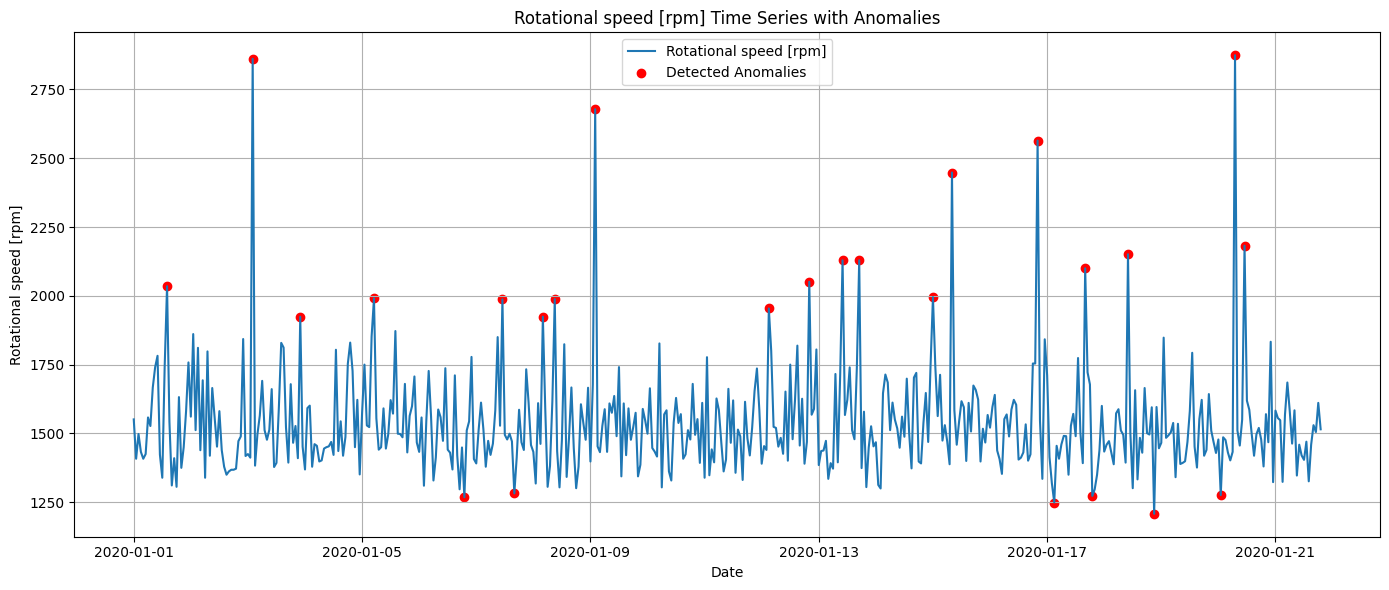


Sampling frequency: 24.00 samples/day


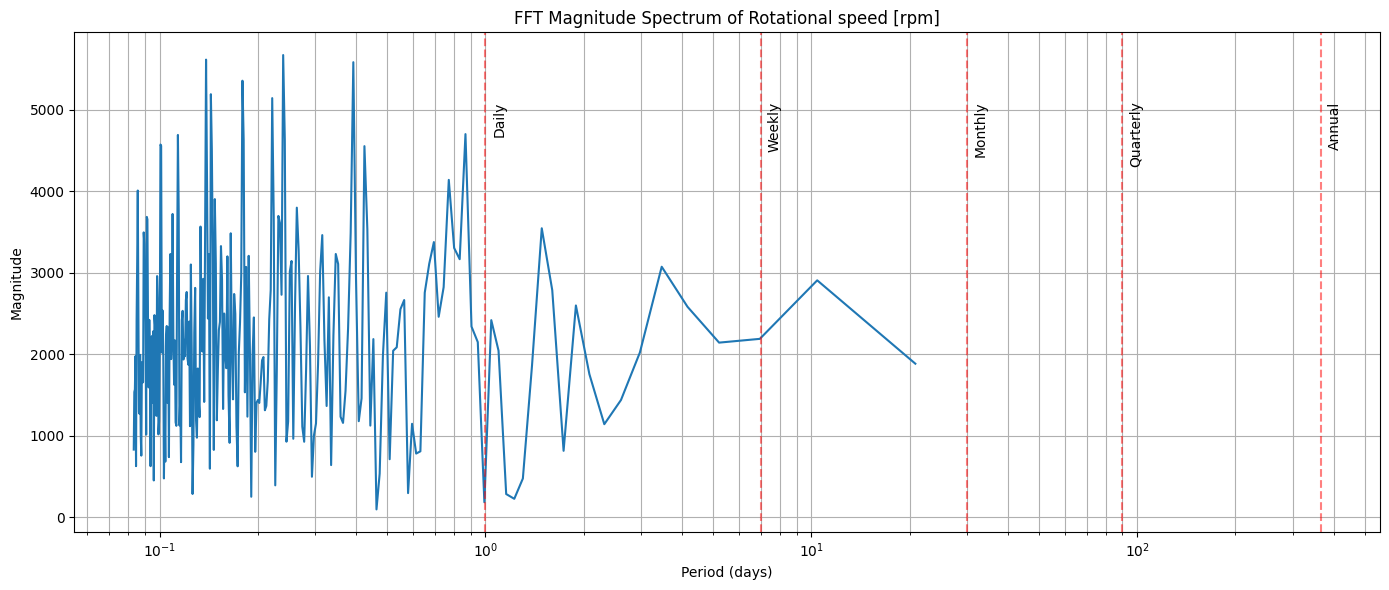


Dominant periods in Rotational speed [rpm]:
1. Period: 0.24 days, Magnitude: 5670.46
2. Period: 0.14 days, Magnitude: 5614.27
3. Period: 0.39 days, Magnitude: 5582.75
4. Period: 0.18 days, Magnitude: 5355.65
5. Period: 0.14 days, Magnitude: 5190.06

Enhanced Failure Analysis:
Failure Type
No Failure            467
Tool Wear Failure      19
Overstrain Failure      8
Power Failure           6
Name: count, dtype: int64


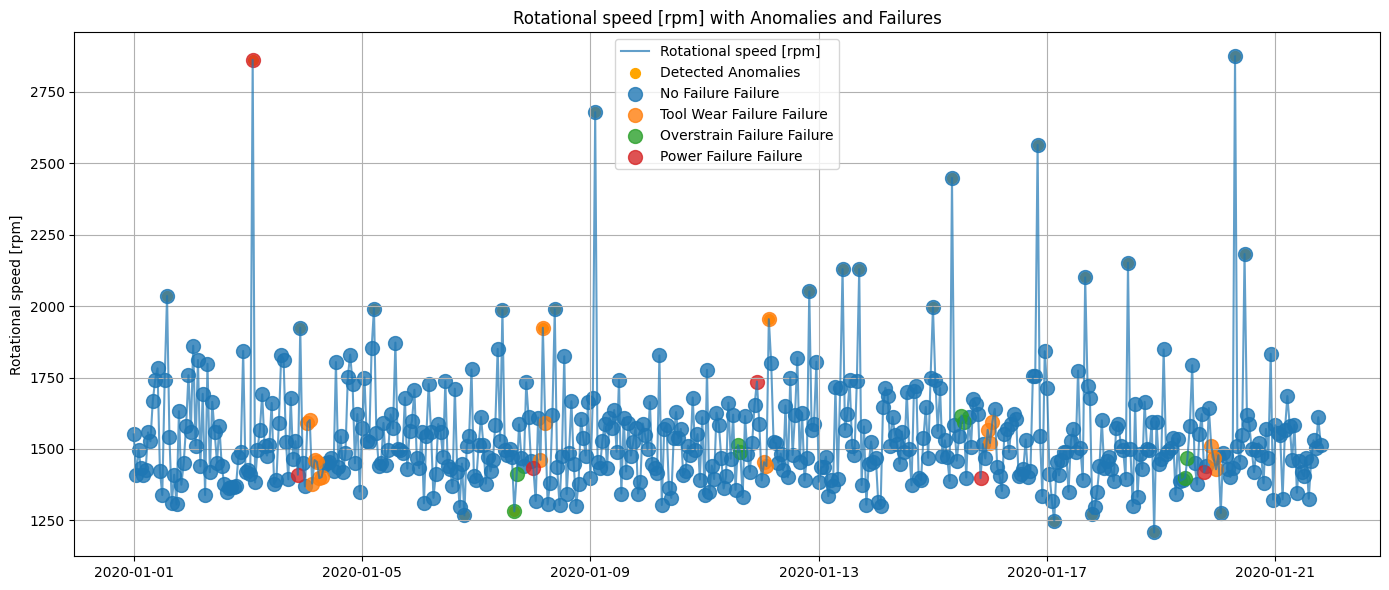

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [DatetimeIndex(['2019-12-31 00:00:00', '2019-12-31 01:00:00',
               '2019-12-31 02:00:00', '2019-12-31 03:00:00',
               '2019-12-31 04:00:00', '2019-12-31 05:00:00',
               '2019-12-31 06:00:00', '2019-12-31 07:00:00',
               '2019-12-31 08:00:00', '2019-12-31 09:00:00',
               ...
               '2020-01-20 10:00:00', '2020-01-20 11:00:00',
               '2020-01-20 12:00:00', '2020-01-20 13:00:00',
               '2020-01-20 14:00:00', '2020-01-20 15:00:00',
               '2020-01-20 16:00:00', '2020-01-20 17:00:00',
               '2020-01-20 18:00:00', '2020-01-20 19:00:00'],
              dtype='datetime64[ns]', length=500, freq='h')] of type DatetimeIndex

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal, stats
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

def enhanced_analysis(df, target_column='Rotational speed [rpm]'):
    """Enhanced analysis with anomaly detection and frequency analysis"""

    # 1. Data Preparation
    if not isinstance(df.index, pd.DatetimeIndex):
        print("Creating synthetic datetime index...")
        df = df.reset_index(drop=True)
        df.index = pd.date_range(start='2020-01-01', periods=len(df), freq='H')

    # 2. Anomaly Detection (New)
    def detect_anomalies(data):
        """Apply multiple anomaly detection methods"""
        # Robust Z-score
        median = np.median(data)
        mad = stats.median_abs_deviation(data)
        z_scores = 0.6745 * (data - median) / mad
        z_anomalies = abs(z_scores) > 3

        # Isolation Forest
        model = IsolationForest(contamination=0.05, random_state=42)
        if_anomalies = model.fit_predict(data.values.reshape(-1, 1)) == -1

        # Combine results (majority vote)
        return z_anomalies | if_anomalies

    anomalies = detect_anomalies(df[target_column])

    # 3. Enhanced Visualization with Anomalies
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df[target_column], label=target_column)
    plt.scatter(df.index[anomalies], df[target_column][anomalies],
                color='red', label='Detected Anomalies')
    plt.title(f'{target_column} Time Series with Anomalies')
    plt.ylabel(target_column)
    plt.xlabel('Date')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 4. Original Frequency Analysis (Preserved)
    signal_values = df[target_column].values

    # Calculate sampling frequency
    time_diff = df.index.to_series().diff().median().total_seconds()
    fs = 1 / (time_diff / 86400)
    print(f"\nSampling frequency: {fs:.2f} samples/day")

    # Detrend and window
    signal_detrended = signal_values - np.mean(signal_values)
    window = signal.windows.hann(len(signal_detrended))
    signal_windowed = signal_detrended * window

    # FFT Analysis
    fft_result = np.fft.rfft(signal_windowed)
    fft_magnitude = np.abs(fft_result)
    freq = np.fft.rfftfreq(len(signal_windowed), d=1/fs)
    periods = 1/freq[1:]
    magnitude = fft_magnitude[1:]

    # FFT Spectrum Plot
    plt.figure(figsize=(14, 6))
    plt.plot(periods, magnitude)
    plt.xscale('log')
    plt.grid(True, which="both", ls="-")
    plt.title(f'FFT Magnitude Spectrum of {target_column}')
    plt.xlabel('Period (days)')
    plt.ylabel('Magnitude')

    common_periods = {
        'Daily': 1,
        'Weekly': 7,
        'Monthly': 30,
        'Quarterly': 90,
        'Annual': 365
    }

    for label, period in common_periods.items():
        plt.axvline(x=period, color='r', linestyle='--', alpha=0.5)
        plt.text(period*1.05, max(magnitude)*0.9, label, rotation=90, va='top')

    plt.tight_layout()
    plt.show()

    # Dominant Frequencies
    sorted_indices = np.argsort(magnitude)[::-1]
    top_n = 5
    top_indices = sorted_indices[:top_n]
    top_periods = periods[top_indices]
    top_magnitudes = magnitude[top_indices]

    print(f"\nDominant periods in {target_column}:")
    for i, (period, mag) in enumerate(zip(top_periods, top_magnitudes), 1):
        print(f"{i}. Period: {period:.2f} days, Magnitude: {mag:.2f}")

    # 5. Failure Analysis (Enhanced)
    if 'Failure Type' in df.columns:
        print("\nEnhanced Failure Analysis:")
        failure_counts = df['Failure Type'].value_counts()
        print(failure_counts)

        # Plot with anomalies and failures
        plt.figure(figsize=(14, 6))
        plt.plot(df.index, df[target_column], label=target_column, alpha=0.7)

        # Plot anomalies
        plt.scatter(df.index[anomalies], df[target_column][anomalies],
                   color='orange', label='Detected Anomalies', s=50)

        # Plot failures
        for failure_type in failure_counts.index:
            failure_points = df[df['Failure Type'] == failure_type]
            plt.scatter(failure_points.index, failure_points[target_column],
                       label=f'{failure_type} Failure', s=100, alpha=0.8)

        plt.title(f'{target_column} with Anomalies and Failures')
        plt.ylabel(target_column)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Calculate anomaly detection accuracy for failures
        failure_dates = df[df['Failure Type'].notna()].index
        true_positives = sum(anomalies.loc[failure_dates - pd.Timedelta(days=1):failure_dates + pd.Timedelta(days=1)])
        print(f"\nAnomalies detected near failure events: {true_positives}/{len(failure_dates)}")

    return anomalies

anomalies = enhanced_analysis(df, 'Rotational speed [rpm]')

for col in ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']:
    enhanced_analysis(df, col)

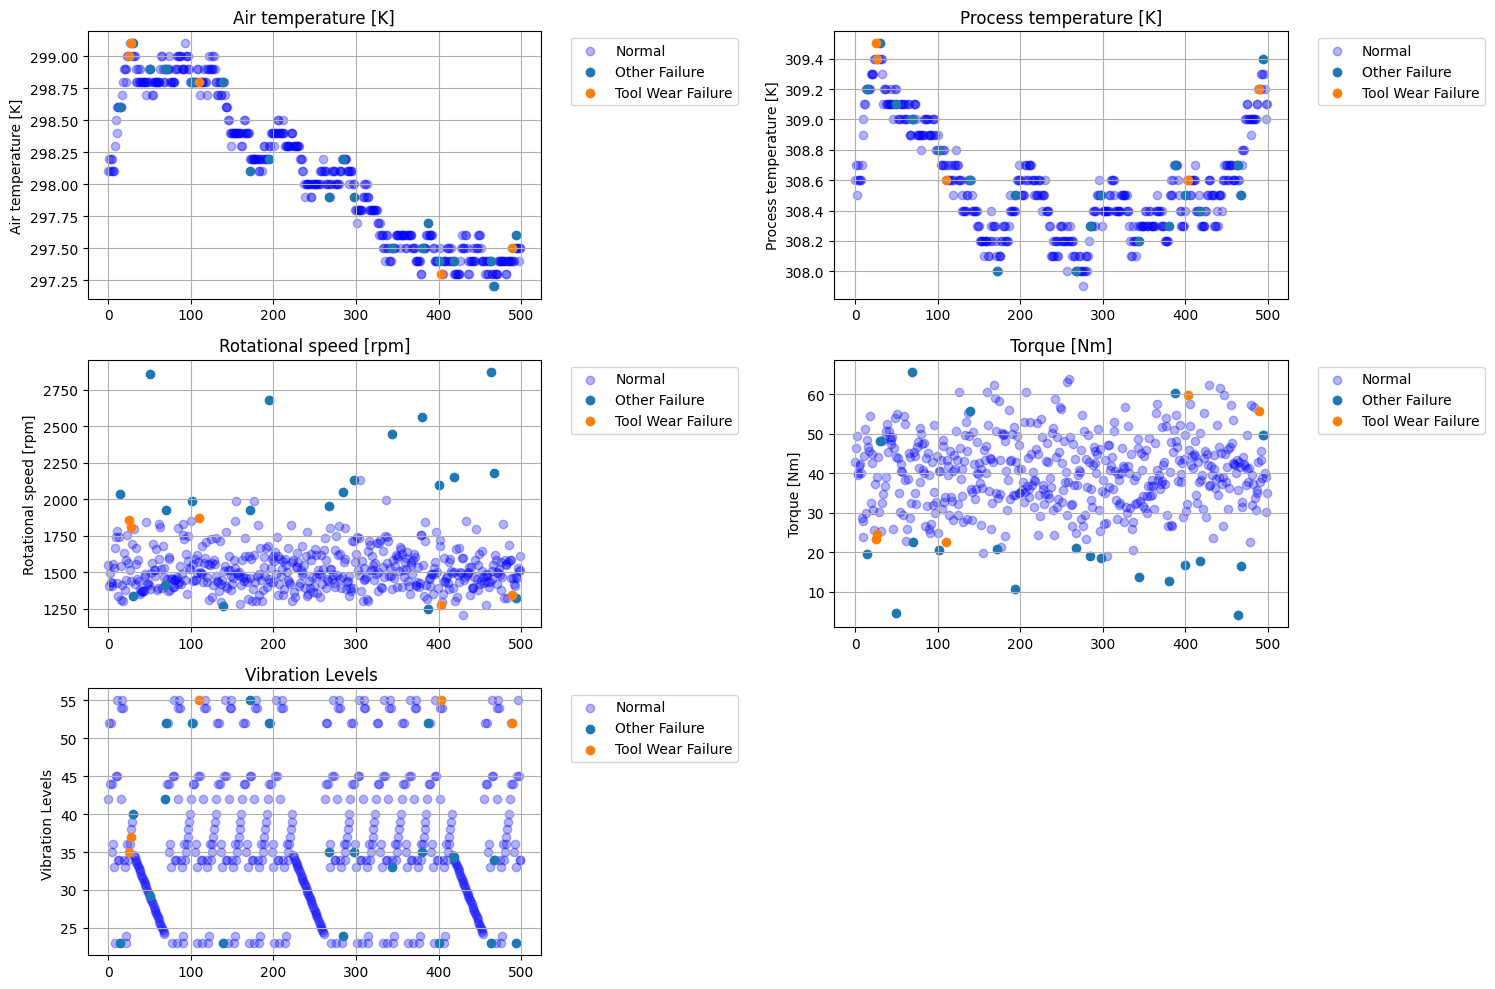

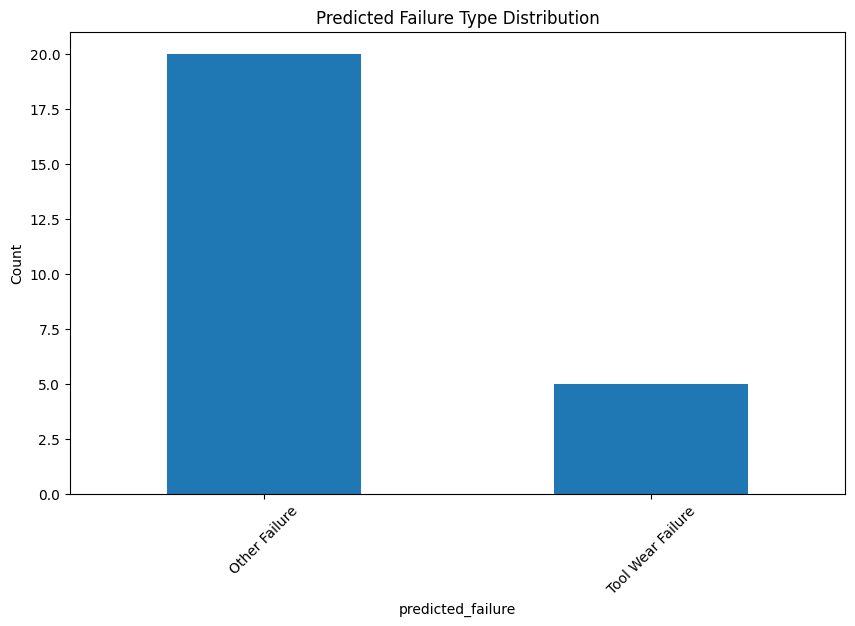


Note: This version of IsolationForest doesn't provide feature importances

Comparison with Actual Failures:
Predicted          Other Failure  Tool Wear Failure
Actual                                             
No Failure                    16                  5
Power Failure                  2                  0
Tool Wear Failure              2                  0

Anomaly Detection Summary:
Total data points: 500
Anomalies detected: 25 (5.00%)

Failure Type Breakdown:
predicted_failure
Other Failure        20
Tool Wear Failure     5
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('/content/CIA-1 Dataset - Dataset (1).csv')

# Select relevant sensor features
sensor_features = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Vibration Levels '
]

# Handle missing values if any
df[sensor_features] = df[sensor_features].interpolate()

# 1. Anomaly Detection using Isolation Forest
def detect_anomalies(df, features):
    """Detect anomalies using Isolation Forest"""

    # Scale features
    scaler = StandardScaler()
    X = scaler.fit_transform(df[features])

    # Train Isolation Forest
    clf = IsolationForest(
        n_estimators=100,
        contamination=0.05,  # Expected % of anomalies
        random_state=42
    )

    # Predict anomalies (-1 for anomalies, 1 for normal)
    preds = clf.fit_predict(X)

    # Add results to dataframe
    df['anomaly_score'] = clf.decision_function(X)  # The lower, the more anomalous
    df['is_anomaly'] = preds == -1

    return df, clf

df, anomaly_model = detect_anomalies(df, sensor_features)

# 2. Failure Type Classification using Anomaly Characteristics
def classify_failures(anomalous_data, features):
    """Classify failure types based on anomaly characteristics"""

    # Calculate how each feature deviates from normal operation
    normal_data = df[~df['is_anomaly']]
    feature_means = normal_data[features].mean()
    feature_stds = normal_data[features].std()

    # Standard deviations from mean for each feature in anomalies
    deviations = (anomalous_data[features] - feature_means) / feature_stds

    # Define failure type rules based on deviations
    conditions = [
        # Heat Dissipation Failure (high temps)
        (deviations['Air temperature [K]'] > 2) &
        (deviations['Process temperature [K]'] > 2),

        # Power Failure (low speed and torque)
        (deviations['Rotational speed [rpm]'] < -2) &
        (deviations['Torque [Nm]'] < -2),

        # Overstrain Failure (high torque and vibration)
        (deviations['Torque [Nm]'] > 2) &
        (deviations['Vibration Levels '] > 2),

        # Tool Wear Failure (gradual changes in all features)
        (np.abs(deviations).mean(axis=1) > 1.5) &
        (np.abs(deviations).max(axis=1) < 3)
    ]

    choices = [
        'Heat Dissipation Failure',
        'Power Failure',
        'Overstrain Failure',
        'Tool Wear Failure'
    ]

    anomalous_data['predicted_failure'] = np.select(conditions, choices, default='Other Failure')

    return anomalous_data

# Apply classification only to anomalous points
anomalies = df[df['is_anomaly']].copy()
if not anomalies.empty:
    anomalies = classify_failures(anomalies, sensor_features)
    df = df.join(anomalies[['predicted_failure']], how='left')

# 3. Visualization
plt.figure(figsize=(15, 10))

# Plot each sensor with anomalies colored by failure type
for i, feature in enumerate(sensor_features, 1):
    plt.subplot(3, 2, i)

    # Plot normal points
    normal = df[~df['is_anomaly']]
    plt.scatter(normal.index, normal[feature], c='blue', alpha=0.3, label='Normal')

    # Plot anomalies if they exist
    if not anomalies.empty and 'predicted_failure' in anomalies.columns:
        for failure_type in anomalies['predicted_failure'].unique():
            subset = anomalies[anomalies['predicted_failure'] == failure_type]
            plt.scatter(subset.index, subset[feature], label=failure_type)

    plt.title(feature)
    plt.ylabel(feature)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)

plt.tight_layout()
plt.show()

# 4. Failure Type Distribution
if not anomalies.empty and 'predicted_failure' in anomalies.columns:
    plt.figure(figsize=(10, 6))
    anomalies['predicted_failure'].value_counts().plot(kind='bar')
    plt.title('Predicted Failure Type Distribution')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# 5. Feature Importance Analysis (based on anomaly scores)
if hasattr(anomaly_model, 'feature_importances_'):
    plt.figure(figsize=(10, 6))
    pd.Series(
        data=anomaly_model.feature_importances_,
        index=sensor_features
    ).sort_values().plot(kind='barh')
    plt.title('Feature Importance for Anomaly Detection')
    plt.xlabel('Importance Score')
    plt.show()
else:
    print("\nNote: This version of IsolationForest doesn't provide feature importances")

# 6. Compare with Actual Failures if available
if 'Failure Type' in df.columns and not anomalies.empty:
    print("\nComparison with Actual Failures:")
    comparison = pd.crosstab(
        df['Failure Type'],
        df['predicted_failure'],
        rownames=['Actual'],
        colnames=['Predicted']
    )
    print(comparison)

# Summary Statistics
print("\nAnomaly Detection Summary:")
print(f"Total data points: {len(df)}")
print(f"Anomalies detected: {df['is_anomaly'].sum()} ({df['is_anomaly'].mean()*100:.2f}%)")

if not anomalies.empty and 'predicted_failure' in anomalies.columns:
    print("\nFailure Type Breakdown:")
    print(anomalies['predicted_failure'].value_counts())

<ipython-input-31-2f60d98cf6cc>:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time = pd.date_range(start='2023-01-01', periods=n_samples, freq='H')


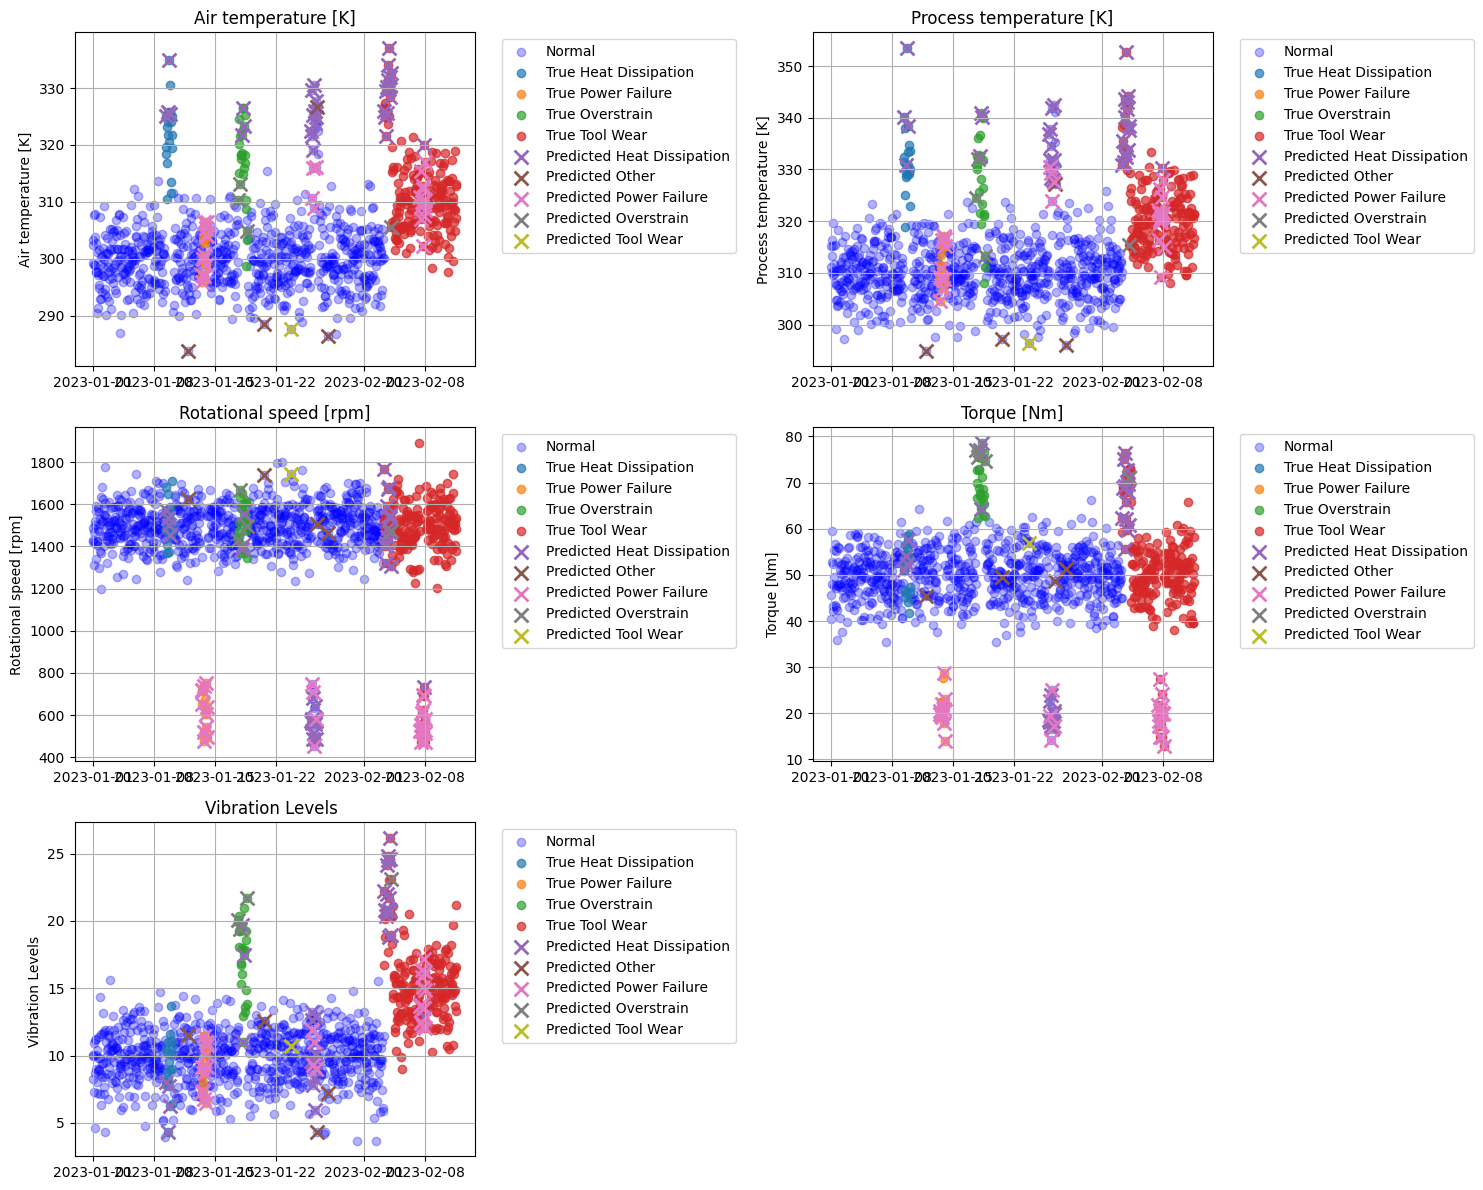


Performance Evaluation:

Confusion Matrix:
Predicted         Heat Dissipation  Normal  Other  Overstrain  Power Failure  \
Actual                                                                         
Heat Dissipation                 4      16      0           0              0   
Normal                          10     721      4           0              4   
Overstrain                       3      19      0           3              0   
Power Failure                    0       4      0           0             11   
Tool Wear                       15     170      0           1             14   

Predicted         Tool Wear  
Actual                       
Heat Dissipation          0  
Normal                    1  
Overstrain                0  
Power Failure             0  
Tool Wear                 0  

Classification Metrics:
       Failure Type  Precision    Recall  F1-Score
0  Heat Dissipation    0.12500  0.200000  0.153846
1     Power Failure    0.37931  0.733333  0.500000
2      

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Create synthetic test data that mimics industrial equipment sensor readings
def create_test_data():
    np.random.seed(42)
    n_samples = 1000
    time = pd.date_range(start='2023-01-01', periods=n_samples, freq='H')

    # Base normal values
    air_temp = np.random.normal(300, 5, n_samples)
    process_temp = air_temp + np.random.normal(10, 2, n_samples)
    rotational_speed = np.random.normal(1500, 100, n_samples)
    torque = np.random.normal(50, 5, n_samples)
    vibration = np.random.normal(10, 2, n_samples)

    # Create different types of failures
    for i in range(n_samples):
        # Heat Dissipation Failure (periodic high temps)
        if i % 200 == 0 and i > 0:
            air_temp[i:i+20] += np.random.uniform(15, 25, 20)
            process_temp[i:i+20] += np.random.uniform(15, 25, 20)

        # Power Failure (sudden drops in speed and torque)
        if i % 300 == 0 and i > 0:
            rotational_speed[i:i+15] *= np.random.uniform(0.3, 0.5, 15)
            torque[i:i+15] *= np.random.uniform(0.3, 0.5, 15)

        # Overstrain Failure (high torque and vibration)
        if i % 400 == 0 and i > 0:
            torque[i:i+25] += np.random.uniform(15, 25, 25)
            vibration[i:i+25] += np.random.uniform(5, 10, 25)

        # Tool Wear Failure (gradual increases)
        if i > 800:
            air_temp[i] += i/100
            process_temp[i] += i/100
            vibration[i] += i/200

    # Create DataFrame
    data = pd.DataFrame({
        'Timestamp': time,
        'Air temperature [K]': air_temp,
        'Process temperature [K]': process_temp,
        'Rotational speed [rpm]': rotational_speed,
        'Torque [Nm]': torque,
        'Vibration Levels ': vibration
    })

    # Add known failure labels for validation
    data['True_Failure'] = 'Normal'
    data.loc[data.index[200:220], 'True_Failure'] = 'Heat Dissipation'
    data.loc[data.index[300:315], 'True_Failure'] = 'Power Failure'
    data.loc[data.index[400:425], 'True_Failure'] = 'Overstrain'
    data.loc[data.index[800:], 'True_Failure'] = 'Tool Wear'

    return data.set_index('Timestamp')

# Create test dataset
test_df = create_test_data()
sensor_features = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Vibration Levels '
]

# 1. Anomaly Detection using Isolation Forest
def detect_anomalies(df, features):
    """Detect anomalies using Isolation Forest"""

    # Scale features
    scaler = StandardScaler()
    X = scaler.fit_transform(df[features])

    # Train Isolation Forest
    clf = IsolationForest(
        n_estimators=100,
        contamination=0.07,  # Slightly higher for test data
        random_state=42
    )

    # Predict anomalies (-1 for anomalies, 1 for normal)
    preds = clf.fit_predict(X)

    # Add results to dataframe
    df['anomaly_score'] = clf.decision_function(X)
    df['is_anomaly'] = preds == -1

    return df, clf

test_df, anomaly_model = detect_anomalies(test_df, sensor_features)

# 2. Failure Type Classification
def classify_failures(anomalous_data, features):
    """Classify failure types based on anomaly characteristics"""

    # Calculate how each feature deviates from normal operation
    normal_data = test_df[~test_df['is_anomaly']]
    feature_means = normal_data[features].mean()
    feature_stds = normal_data[features].std()

    # Standard deviations from mean for each feature in anomalies
    deviations = (anomalous_data[features] - feature_means) / feature_stds

    # Define failure type rules
    conditions = [
        # Heat Dissipation Failure (high temps)
        (deviations['Air temperature [K]'] > 2) &
        (deviations['Process temperature [K]'] > 2),

        # Power Failure (low speed and torque)
        (deviations['Rotational speed [rpm]'] < -2) &
        (deviations['Torque [Nm]'] < -2),

        # Overstrain Failure (high torque and vibration)
        (deviations['Torque [Nm]'] > 2) &
        (deviations['Vibration Levels '] > 2),

        # Tool Wear Failure (gradual changes)
        (np.abs(deviations).mean(axis=1) > 1.5) &
        (np.abs(deviations).max(axis=1) < 3)
    ]

    choices = [
        'Heat Dissipation',
        'Power Failure',
        'Overstrain',
        'Tool Wear'
    ]

    anomalous_data['Predicted_Failure'] = np.select(conditions, choices, default='Other')

    return anomalous_data

# Apply classification
anomalies = test_df[test_df['is_anomaly']].copy()
if not anomalies.empty:
    anomalies = classify_failures(anomalies, sensor_features)
    test_df = test_df.join(anomalies[['Predicted_Failure']], how='left')

# 3. Evaluation and Visualization
plt.figure(figsize=(15, 12))

# Plot each sensor with true and predicted failures
for i, feature in enumerate(sensor_features, 1):
    plt.subplot(3, 2, i)

    # Plot normal points
    normal = test_df[test_df['True_Failure'] == 'Normal']
    plt.scatter(normal.index, normal[feature], c='blue', alpha=0.3, label='Normal')

    # Plot true failures
    for failure_type in test_df['True_Failure'].unique():
        if failure_type != 'Normal':
            subset = test_df[test_df['True_Failure'] == failure_type]
            plt.scatter(subset.index, subset[feature], label=f'True {failure_type}', alpha=0.7)

    # Plot predicted anomalies
    if not anomalies.empty and 'Predicted_Failure' in anomalies.columns:
        for failure_type in anomalies['Predicted_Failure'].unique():
            subset = anomalies[anomalies['Predicted_Failure'] == failure_type]
            plt.scatter(subset.index, subset[feature], marker='x', s=100,
                       label=f'Predicted {failure_type}', linewidths=2)

    plt.title(feature)
    plt.ylabel(feature)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)

plt.tight_layout()
plt.show()

# 4. Performance Metrics
if not anomalies.empty and 'Predicted_Failure' in anomalies.columns:
    print("\nPerformance Evaluation:")

    # Confusion Matrix
    confusion = pd.crosstab(
        test_df['True_Failure'],
        test_df['Predicted_Failure'].fillna('Normal'),
        rownames=['Actual'],
        colnames=['Predicted']
    )
    print("\nConfusion Matrix:")
    print(confusion)

    # Precision, Recall calculations
    results = []
    for failure_type in ['Heat Dissipation', 'Power Failure', 'Overstrain', 'Tool Wear']:
        true_pos = confusion.loc[failure_type, failure_type]
        false_pos = confusion[failure_type].sum() - true_pos
        false_neg = confusion.loc[failure_type].sum() - true_pos

        precision = true_pos / (true_pos + false_pos) if (true_pos + false_pos) > 0 else 0
        recall = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0

        results.append({
            'Failure Type': failure_type,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        })

    metrics_df = pd.DataFrame(results)
    print("\nClassification Metrics:")
    print(metrics_df)

# 5. Summary Statistics
print("\nTest Results Summary:")
print(f"Total data points: {len(test_df)}")
print(f"Anomalies detected: {test_df['is_anomaly'].sum()} ({test_df['is_anomaly'].mean()*100:.2f}%)")

if not anomalies.empty and 'Predicted_Failure' in anomalies.columns:
    print("\nFailure Type Breakdown:")
    print(anomalies['Predicted_Failure'].value_counts())

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Create test data with specific values
def create_test_data():
    # Create time index (using 'h' instead of deprecated 'H')
    time = pd.date_range(start='2023-01-01', periods=50, freq='h')

    # Define specific sensor values that include different failure patterns
    data = {
        'Air temperature [K]': [
            300, 302, 301, 303, 302,  # Normal operation
            305, 308, 312, 315, 318,   # Heat dissipation failure (gradual rise)
            320, 322, 325, 323, 320,    # Continuing heat issue
            302, 300, 301, 299, 300,    # Back to normal
            290, 285, 280, 275, 270,    # Power failure (temperature drop)
            265, 260, 255, 250, 245,    # Continuing power issue
            300, 302, 301, 300, 299,    # Back to normal
            300, 305, 310, 320, 330,    # Overstrain failure (rapid rise)
            340, 350, 360, 370, 380,    # Continuing overstrain
            300, 300, 300, 300, 300,    # Back to normal
            300, 305, 310, 315, 320     # Tool wear (gradual increase)
        ],
        'Process temperature [K]': [
            310, 312, 311, 313, 312,  # Normal
            315, 318, 322, 325, 328,   # Heat dissipation
            330, 332, 335, 333, 330,   # Continuing
            312, 310, 311, 309, 310,   # Normal
            300, 295, 290, 285, 280,   # Power failure
            275, 270, 265, 260, 255,  # Continuing
            310, 312, 311, 310, 309,  # Normal
            310, 315, 320, 330, 340,   # Overstrain
            350, 360, 370, 380, 390,   # Continuing
            310, 310, 310, 310, 310,  # Normal
            310, 315, 320, 325, 330   # Tool wear
        ],
        'Rotational speed [rpm]': [
            1500, 1490, 1510, 1505, 1495,  # Normal
            1480, 1450, 1420, 1400, 1380,  # Heat dissipation
            1350, 1320, 1300, 1280, 1250,  # Continuing
            1500, 1495, 1505, 1510, 1500,  # Normal
            800, 700, 600, 500, 400,       # Power failure
            300, 200, 100, 50, 0,          # Continuing
            1500, 1500, 1500, 1500, 1500,  # Normal
            1600, 1700, 1800, 1900, 2000,  # Overstrain
            2100, 2200, 2300, 2400, 2500,  # Continuing
            1500, 1500, 1500, 1500, 1500,  # Normal
            1500, 1520, 1540, 1560, 1580   # Tool wear
        ],
        'Torque [Nm]': [
            50, 51, 49, 50, 50,          # Normal
            55, 58, 60, 62, 65,          # Heat dissipation
            68, 70, 72, 70, 68,           # Continuing
            50, 49, 51, 50, 50,          # Normal
            20, 15, 10, 5, 0,            # Power failure
            0, 0, 0, 0, 0,               # Continuing
            50, 50, 50, 50, 50,          # Normal
            60, 70, 80, 90, 100,         # Overstrain
            110, 120, 130, 140, 150,     # Continuing
            50, 50, 50, 50, 50,          # Normal
            50, 52, 54, 56, 58           # Tool wear
        ],
        'Vibration Levels ': [
            10, 11, 9, 10, 10,           # Normal
            12, 14, 15, 16, 17,          # Heat dissipation
            18, 19, 20, 19, 18,          # Continuing
            10, 9, 11, 10, 10,          # Normal
            5, 3, 1, 0, 0,              # Power failure
            0, 0, 0, 0, 0,              # Continuing
            10, 10, 10, 10, 10,         # Normal
            15, 20, 25, 30, 35,         # Overstrain
            40, 45, 50, 55, 60,         # Continuing
            10, 10, 10, 10, 10,         # Normal
            10, 12, 14, 16, 18          # Tool wear
        ],
        'True_Failure': ['Normal']*50  # Initialize all as normal
    }

    # Create DataFrame
    df = pd.DataFrame(data, index=time)

    # Label the failure periods
    df.loc[df.index[5:14], 'True_Failure'] = 'Heat Dissipation'
    df.loc[df.index[20:29], 'True_Failure'] = 'Power Failure'
    df.loc[df.index[35:44], 'True_Failure'] = 'Overstrain'
    df.loc[df.index[45:49], 'True_Failure'] = 'Tool Wear'

    return df

# Create test dataset
test_df = create_test_data()
sensor_features = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Vibration Levels '
]

# Display the test data
print("Test Data with Specific Values:")
print(test_df.head(15))

# 1. Anomaly Detection using Isolation Forest
def detect_anomalies(df, features):
    """Detect anomalies using Isolation Forest"""

    # Scale features
    scaler = StandardScaler()
    X = scaler.fit_transform(df[features])

    # Train Isolation Forest
    clf = IsolationForest(
        n_estimators=100,
        contamination=0.1,  # Expecting about 10% anomalies
        random_state=42
    )

    # Predict anomalies (-1 for anomalies, 1 for normal)
    preds = clf.fit_predict(X)

    # Add results to dataframe
    df['anomaly_score'] = clf.decision_function(X)
    df['is_anomaly'] = preds == -1

    return df, clf

test_df, anomaly_model = detect_anomalies(test_df, sensor_features)

# 2. Failure Type Classification
def classify_failures(anomalous_data, features):
    """Classify failure types based on anomaly characteristics"""

    # Calculate how each feature deviates from normal operation
    normal_data = test_df[test_df['is_anomaly'] == False]
    feature_means = normal_data[features].mean()
    feature_stds = normal_data[features].std()

    # Standard deviations from mean for each feature in anomalies
    deviations = (anomalous_data[features] - feature_means) / feature_stds

    # Define failure type rules
    conditions = [
        # Heat Dissipation Failure (high temps)
        (deviations['Air temperature [K]'] > 1.5) &
        (deviations['Process temperature [K]'] > 1.5),

        # Power Failure (low speed and torque)
        (deviations['Rotational speed [rpm]'] < -2) &
        (deviations['Torque [Nm]'] < -2),

        # Overstrain Failure (high torque and vibration)
        (deviations['Torque [Nm]'] > 2) &
        (deviations['Vibration Levels '] > 2),

        # Tool Wear Failure (gradual changes)
        (np.abs(deviations).mean(axis=1) > 1) &
        (np.abs(deviations).max(axis=1) < 2.5)
    ]

    choices = [
        'Heat Dissipation',
        'Power Failure',
        'Overstrain',
        'Tool Wear'
    ]

    anomalous_data['Predicted_Failure'] = np.select(conditions, choices, default='Other')

    return anomalous_data

# Apply classification
anomalies = test_df[test_df['is_anomaly']].copy()
if not anomalies.empty:
    anomalies = classify_failures(anomalies, sensor_features)
    test_df = test_df.join(anomalies[['Predicted_Failure']], how='left')

# 3. Display Results
print("\nDetection Results:")
print(test_df[['is_anomaly', 'Predicted_Failure', 'True_Failure']].dropna())

# 4. Evaluation Metrics
if not anomalies.empty and 'Predicted_Failure' in anomalies.columns:
    print("\nClassification Report:")
    print(classification_report(
        test_df['True_Failure'],
        test_df['Predicted_Failure'].fillna('Normal'),
        target_names=['Heat Dissipation', 'Power Failure', 'Overstrain', 'Tool Wear', 'Normal']
    ))

# 5. Visualization
plt.figure(figsize=(15, 10))

for i, feature in enumerate(sensor_features, 1):
    plt.subplot(3, 2, i)

    # Plot normal points
    normal = test_df[test_df['True_Failure'] == 'Normal']
    plt.plot(normal.index, normal[feature], 'bo', alpha=0.5, label='Normal')

    # Plot true failures
    for failure_type in ['Heat Dissipation', 'Power Failure', 'Overstrain', 'Tool Wear']:
        subset = test_df[test_df['True_Failure'] == failure_type]
        plt.plot(subset.index, subset[feature], 'o',
                label=f'True {failure_type}', alpha=0.7)

    # Plot predicted anomalies
    if not anomalies.empty and 'Predicted_Failure' in anomalies.columns:
        for failure_type in anomalies['Predicted_Failure'].unique():
            subset = anomalies[anomalies['Predicted_Failure'] == failure_type]
            plt.plot(subset.index, subset[feature], 'rx', markersize=10,
                   label=f'Predicted {failure_type}')

    plt.title(feature)
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)

plt.tight_layout()
plt.show()

ValueError: Length of values (55) does not match length of index (50)